## Preperation

In [103]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels

In [ ]:
# #No need to Run
# folders = [
#     r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\SPA',
#     r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\FRA',
#     r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\ENG']

# dataframes = []
# league_mapping = {'SPA': 'La Liga','FRA': 'Ligue 1','ENG': 'Premier League'}
# for folder in folders:
#     all_csv_files = glob(os.path.join(folder, "*.csv"))
#     league_name = os.path.basename(folder)  
#     for file in all_csv_files:
#         df = pd.read_csv(file)
#         df['League'] = league_mapping[league_name]  
#         dataframes.append(df)
# combined_df = pd.concat(dataframes, ignore_index=True)
# combined_df.to_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\combined_stats.csv', index=False)


In [ ]:
# #No need to Run
# def determine_season(timestamp):
#     date = pd.to_datetime(timestamp) 
#     if pd.Timestamp('2017-08-01') <= date <= pd.Timestamp('2018-06-30'):
#         return '2017-18'
#     elif pd.Timestamp('2018-08-01') <= date <= pd.Timestamp('2019-06-30'):
#         return '2018-19'
#     else:
#         return '2019-20'

# combined_df['Season'] = combined_df['Timestamp'].apply(determine_season)

# combined_df.to_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\combined_stats.csv', index=False)


In [ ]:
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 1000]  
# labels = ['1\'-10\'', '11\'-20\'', '21\'-30\'', '31\'-40\'', '41\'-50\'', '51\'-60\'', '61\'-70\'', '71\'-80\'', '81\'-90\'+']

# combined_df.loc[:, '10-minute Period'] = pd.cut(combined_df['Minute'], bins=bins, labels=labels, right=False, include_lowest=True)

# combined_df.head()

In [ ]:
# #We needed to do this this way because the minute notation used for stoppage time in the first half 
# #overlaps with the notation used for the beginning of the second half
# half_values = []
# current_half = 'First Half'

# for idx, row in combined_df.iterrows():
#     if row['Incident'] == 'Stop RT1':
#         current_half = 'Second Half'
    
#     half_values.append(current_half)
    
#     if idx < len(combined_df) - 1:
#         if row['RBallID'] != combined_df.loc[idx + 1, 'RBallID']:
#             current_half = 'First Half'

# combined_df['Half'] = half_values

# print(combined_df)
# combined_df.to_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\combined_stats_updated.csv', index=False)



In [172]:
combined_df=pd.read_csv(r'C:\Users\giann\Downloads\JuniorQuantAssignmentData\Part1\combined_stats_updated.csv')

In [3]:
combined_df.isnull().values.any()

np.False_

In [4]:
combined_df.head()

,RBallID,HomeTeam,AwayTeam,Timestamp,Incident,IncidentNumber,Minute,League,Season,10-minute Period,Half
0,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:01:36,Lineup changed,0,0,La Liga,2017-18,1'-10',First Half
1,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:29:21,Scout in Stadion,1,0,La Liga,2017-18,1'-10',First Half
2,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:29:23,Transmission Online,2,0,La Liga,2017-18,1'-10',First Half
3,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:29:33,GCC,3,0,La Liga,2017-18,1'-10',First Half
4,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:59:30,GCC,4,0,La Liga,2017-18,1'-10',First Half


In [5]:
combined_df.count()

RBallID             3101585
HomeTeam            3101585
AwayTeam            3101585
Timestamp           3101585
Incident            3101585
IncidentNumber      3101585
Minute              3101585
League              3101585
Season              3101585
10-minute Period    3101585
Half                3101585
dtype: int64

## 2. Descriptive Statistics for Corners, Shots on Target, Goals

In [6]:
combined_df['Incident'].isin(['CR1']).describe()

count     3101585
unique          2
top         False
freq      3083440
Name: Incident, dtype: object

In [7]:
combined_df['Incident'].value_counts().get(['CR1','CR2'],0)

Incident
CR1    18145
CR2    14499
Name: count, dtype: int64

In [8]:
combined_df.loc[combined_df['Incident'] == 'CR1', 'League'].value_counts()

League
Premier League    6546
La Liga           6103
Ligue 1           5496
Name: count, dtype: int64

In [9]:
combined_df.loc[combined_df['Incident'] == 'CR2', 'League'].value_counts()

League
Premier League    5318
La Liga           4681
Ligue 1           4500
Name: count, dtype: int64

In [10]:
(combined_df.loc[combined_df['Incident'] == 'CR1', 'League'].value_counts())+(combined_df.loc[combined_df['Incident'] == 'CR2', 'League'].value_counts())

League
Premier League    11864
La Liga           10784
Ligue 1            9996
Name: count, dtype: int64

In [173]:
tcorners_df = combined_df[combined_df['Incident'].isin(['CR1', 'CR2'])]

corners_per_match = tcorners_df.groupby('RBallID').size().reset_index(name='Corners')

corner_matches = combined_df[['RBallID']].drop_duplicates()

corners_all_matches = pd.merge(corner_matches, corners_per_match, on='RBallID', how='left').fillna(0)

corners_all_matches['Corners'] = corners_all_matches['Corners'].astype(int)

corners_all_matches

,RBallID,Corners
0,860270,6
1,860271,7
2,860272,9
3,860273,6
4,860274,10
...,...,...
3291,1299236,6
3292,1299237,9
3293,1299238,6
3294,1299239,10


In [12]:
corners_all_matches.describe()

,RBallID,Corners
count,3.296000e+03,3296.000000
mean,1.065961e+06,9.904126
std,1.334804e+05,3.418849
min,8.491370e+05,0.000000
25%,9.391728e+05,8.000000
50%,1.064748e+06,10.000000
75%,1.184468e+06,12.000000
max,1.299240e+06,24.000000


In [174]:
corners_df = combined_df[combined_df['Incident'].isin(['CR1', 'CR2'])]
corners_per_game = corners_df.groupby(['League', 'RBallID']).size().reset_index(name='Corners')
corners_per_league = corners_per_game.groupby('League')['Corners'].sum().reset_index(name='Total Corners')

#We can't use .mean() to find the average because that wouldn't take into account the games with no corners for either team.
games_per_league=combined_df.groupby('League')['RBallID'].nunique().reset_index(name='Total Games')

corners_average = pd.merge(corners_per_league, games_per_league, on='League')
corners_average['Corners Per Game']=corners_average['Total Corners']/corners_average['Total Games']

cr1_df = combined_df[combined_df['Incident'] == 'CR1']
cr2_df = combined_df[combined_df['Incident'] == 'CR2']

cr1_corners_per_game = cr1_df.groupby(['League', 'RBallID']).size().reset_index(name='Home Corners')
home_corners_per_league = cr1_corners_per_game.groupby('League')['Home Corners'].sum().reset_index(name='Total Home Corners')

cr2_corners_per_game = cr2_df.groupby(['League', 'RBallID']).size().reset_index(name='Away Corners')
away_corners_per_league = cr2_corners_per_game.groupby('League')['Away Corners'].sum().reset_index(name='Total Away Corners')

average_corners_all = pd.merge(home_corners_per_league,(pd.merge(away_corners_per_league, corners_average, on='League', how='outer')), on='League', how='outer')
average_corners_all['Home Corners Per Game']=average_corners_all['Total Home Corners']/average_corners_all['Total Games']
average_corners_all['Away Corners Per Game']=average_corners_all['Total Away Corners']/average_corners_all['Total Games']
average_corners_all

,League,Total Home Corners,Total Away Corners,Total Corners,Total Games,Corners Per Game,Home Corners Per Game,Away Corners Per Game
0,La Liga,6103,4681,10784,1127,9.568767,5.415262,4.153505
1,Ligue 1,5496,4500,9996,1034,9.667311,5.315280,4.352031
2,Premier League,6546,5318,11864,1135,10.452863,5.767401,4.685463


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\603801107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y='Total Corners', data=average_corners_all, palette='cool')


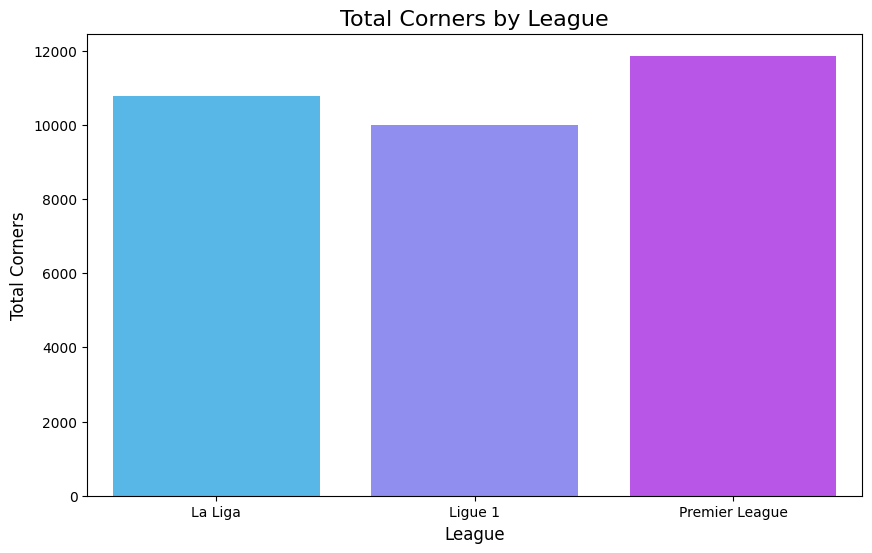

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='League', y='Total Corners', data=average_corners_all, palette='cool')
plt.title('Total Corners by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Total Corners', fontsize=12)
plt.show()

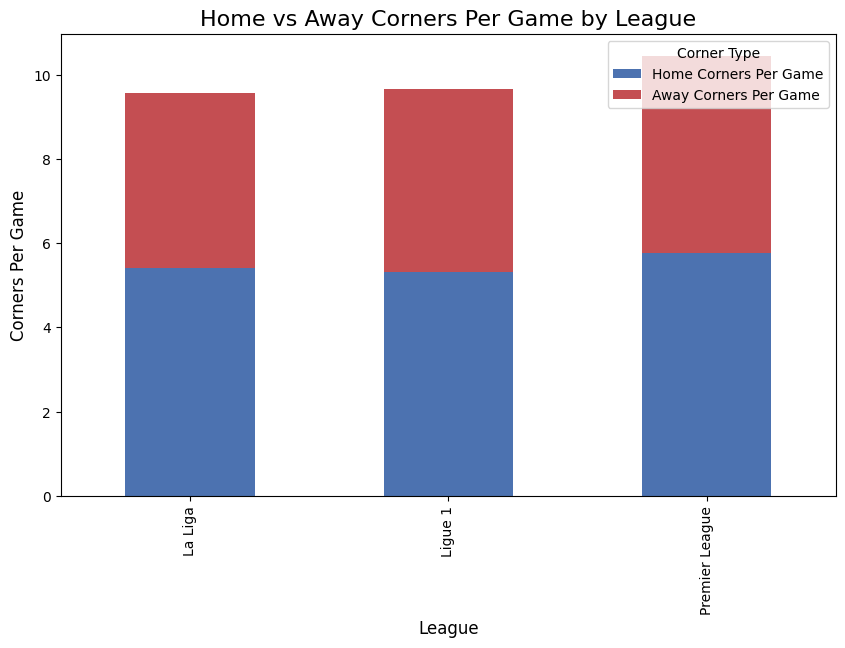

In [53]:
average_corners_all.set_index('League')[['Home Corners Per Game', 'Away Corners Per Game']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#c44e52'])
plt.title('Home vs Away Corners Per Game by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Corners Per Game', fontsize=12)
plt.legend(loc='upper right', title='Corner Type')
plt.show()

In [15]:
corners_per_game.describe()

,RBallID,Corners
count,3.287000e+03,3287.000000
mean,1.065620e+06,9.931244
std,1.334055e+05,3.383954
min,8.491370e+05,1.000000
25%,9.391705e+05,8.000000
50%,1.064745e+06,10.000000
75%,1.182928e+06,12.000000
max,1.299240e+06,24.000000


In [16]:
combined_df.head()

,RBallID,HomeTeam,AwayTeam,Timestamp,Incident,IncidentNumber,Minute,League,Season,10-minute Period,Half
0,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:01:36,Lineup changed,0,0,La Liga,2017-18,1'-10',First Half
1,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:29:21,Scout in Stadion,1,0,La Liga,2017-18,1'-10',First Half
2,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:29:23,Transmission Online,2,0,La Liga,2017-18,1'-10',First Half
3,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:29:33,GCC,3,0,La Liga,2017-18,1'-10',First Half
4,860270,CD Leganes,Deportivo Alaves,08/18/2017 17:59:30,GCC,4,0,La Liga,2017-18,1'-10',First Half


In [17]:
combined_df['Incident'].isin(['SHG1']).describe()

count     3101585
unique          2
top         False
freq      3088737
Name: Incident, dtype: object

In [18]:
combined_df['Incident'].value_counts().get(['SHG1','SHG2'],0)

Incident
SHG1    12848
SHG2    10446
Name: count, dtype: int64

In [19]:
combined_df.loc[combined_df['Incident'] == 'SHG1', 'League'].value_counts()

League
La Liga           4504
Premier League    4289
Ligue 1           4055
Name: count, dtype: int64

In [20]:
combined_df.loc[combined_df['Incident'] == 'SHG2', 'League'].value_counts()

League
Premier League    3641
La Liga           3507
Ligue 1           3298
Name: count, dtype: int64

In [21]:
(combined_df.loc[combined_df['Incident'] == 'SHG1', 'League'].value_counts())+(combined_df.loc[combined_df['Incident'] == 'SHG2', 'League'].value_counts())

League
La Liga           8011
Ligue 1           7353
Premier League    7930
Name: count, dtype: int64

In [181]:
tshots_df = combined_df[combined_df['Incident'].isin(['SHG1', 'SHG2'])]

shots_per_match = tshots_df.groupby('RBallID').size().reset_index(name='Shots on Target')

shots_matches = combined_df[['RBallID']].drop_duplicates()

shots_all_matches = pd.merge(shots_matches, shots_per_match, on='RBallID', how='left').fillna(0)

shots_all_matches['Shots on Target'] = shots_all_matches['Shots on Target'].astype(int)

shots_all_matches

,RBallID,Shots on Target
0,860270,11
1,860271,13
2,860272,12
3,860273,6
4,860274,8
...,...,...
3291,1299236,6
3292,1299237,12
3293,1299238,4
3294,1299239,3


In [24]:
shots_all_matches.describe()

,RBallID,Shots on Target
count,3.296000e+03,3296.000000
mean,1.065961e+06,7.067354
std,1.334804e+05,3.107632
min,8.491370e+05,0.000000
25%,9.391728e+05,5.000000
50%,1.064748e+06,7.000000
75%,1.184468e+06,9.000000
max,1.299240e+06,25.000000


In [29]:
shots_df = combined_df[combined_df['Incident'].isin(['SHG1', 'SHG2'])]
shots_per_game = shots_df.groupby(['League', 'RBallID']).size().reset_index(name='Shots')
shots_per_league = shots_per_game.groupby('League')['Shots'].sum().reset_index(name='Total Shots on Target')

#We can't use .mean() to find the average because that wouldn't take into account the games with no corners for either team.
games_per_league=combined_df.groupby('League')['RBallID'].nunique().reset_index(name='Total Games')

shots_average = pd.merge(shots_per_league, games_per_league, on='League')
shots_average['Shots on Target Per Game']=shots_average['Total Shots on Target']/shots_average['Total Games']

shg1_df = combined_df[combined_df['Incident'] == 'SHG1']
shg2_df = combined_df[combined_df['Incident'] == 'SHG2']

shg1_shots_per_game = shg1_df.groupby(['League', 'RBallID']).size().reset_index(name='Home Shots on Target')
home_shots_per_league = shg1_shots_per_game.groupby('League')['Home Shots on Target'].sum().reset_index(name='Total Home Shots on Target')

shg2_shots_per_game = shg2_df.groupby(['League', 'RBallID']).size().reset_index(name='Away Shots on Target')
away_shots_per_league = shg2_shots_per_game.groupby('League')['Away Shots on Target'].sum().reset_index(name='Total Away Shots on Target')

average_shots_all = pd.merge(home_shots_per_league,(pd.merge(away_shots_per_league, shots_average, on='League', how='outer')), on='League', how='outer')
average_shots_all['Home Shots on Target Per Game']=average_shots_all['Total Home Shots on Target']/average_shots_all['Total Games']
average_shots_all['Away Shots on Target Per Game']=average_shots_all['Total Away Shots on Target']/average_shots_all['Total Games']
print(average_shots_all)

           League  Total Home Shots on Target  Total Away Shots on Target  \
0         La Liga                        4504                        3507   
1         Ligue 1                        4055                        3298   
2  Premier League                        4289                        3641   

   Total Shots on Target  Total Games  Shots on Target Per Game  \
0                   8011         1127                  7.108252   
1                   7353         1034                  7.111219   
2                   7930         1135                  6.986784   

   Home Shots on Target Per Game  Away Shots on Target Per Game  
0                       3.996451                       3.111801  
1                       3.921663                       3.189555  
2                       3.778855                       3.207930  


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\1029203713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y='Total Shots on Target', data=average_shots_all, palette='cool')


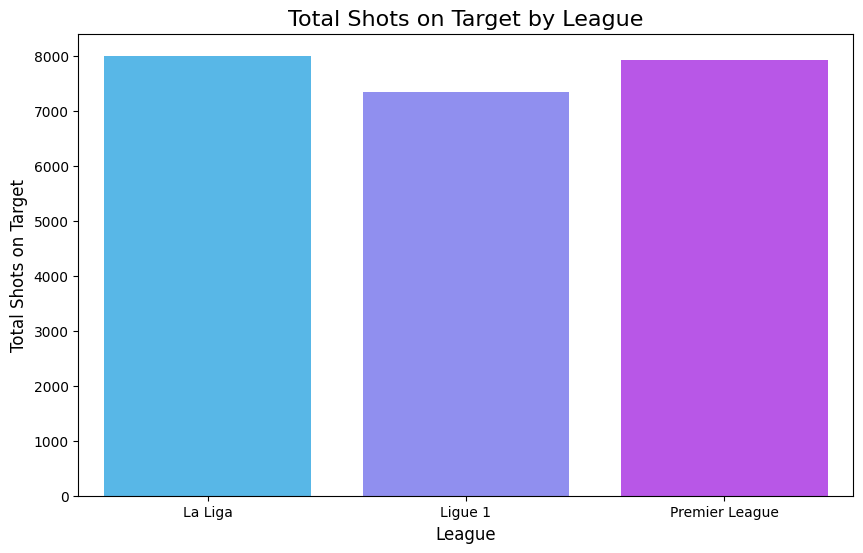

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='League', y='Total Shots on Target', data=average_shots_all, palette='cool')
plt.title('Total Shots on Target by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Total Shots on Target', fontsize=12)
plt.show()

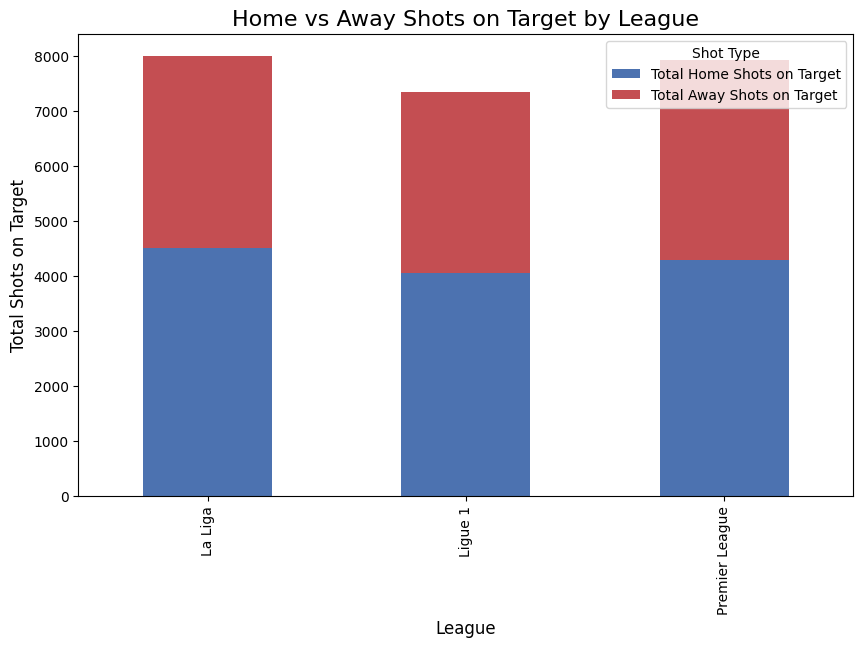

In [52]:
average_shots_all.set_index('League')[['Total Home Shots on Target', 'Total Away Shots on Target']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#c44e52'])
plt.title('Home vs Away Shots on Target by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Total Shots on Target', fontsize=12)
plt.legend(loc='upper right', title='Shot Type')
plt.show()

In [33]:
combined_df['Incident'].isin(['GOAL1']).describe()

count     3101585
unique          2
top         False
freq      3096029
Name: Incident, dtype: object

In [32]:
combined_df['Incident'].value_counts().get(['GOAL1','GOAL2'],0)

Incident
GOAL1    5556
GOAL2    4129
Name: count, dtype: int64

In [34]:
combined_df.loc[combined_df['Incident'] == 'GOAL1', 'League'].value_counts()

League
Premier League    1929
La Liga           1917
Ligue 1           1710
Name: count, dtype: int64

In [35]:
combined_df.loc[combined_df['Incident'] == 'GOAL2', 'League'].value_counts()

League
Premier League    1484
La Liga           1398
Ligue 1           1247
Name: count, dtype: int64

In [36]:
(combined_df.loc[combined_df['Incident'] == 'GOAL1', 'League'].value_counts())+(combined_df.loc[combined_df['Incident'] == 'GOAL2', 'League'].value_counts())

League
Premier League    3413
La Liga           3315
Ligue 1           2957
Name: count, dtype: int64

In [37]:
tgoals_df = combined_df[combined_df['Incident'].isin(['GOAL1', 'GOAL2'])]

goals_per_match = tgoals_df.groupby('RBallID').size().reset_index(name='Goals')

goals_matches = combined_df[['RBallID']].drop_duplicates()

goals_all_matches = pd.merge(goals_matches, goals_per_match, on='RBallID', how='left').fillna(0)

goals_all_matches['Goals'] = goals_all_matches['Goals'].astype(int)

print(goals_all_matches)

      RBallID  Goals
0      860270      1
1      860271      1
2      860272      6
3      860273      4
4      860274      2
...       ...    ...
3291  1299236      3
3292  1299237      6
3293  1299238      4
3294  1299239      4
3295  1299240      2

[3296 rows x 2 columns]


In [38]:
goals_all_matches.describe()

,RBallID,Goals
count,3.296000e+03,3296.000000
mean,1.065961e+06,2.938410
std,1.334804e+05,1.732883
min,8.491370e+05,0.000000
25%,9.391728e+05,2.000000
50%,1.064748e+06,3.000000
75%,1.184468e+06,4.000000
max,1.299240e+06,12.000000


In [39]:
goals_df = combined_df[combined_df['Incident'].isin(['GOAL1', 'GOAL2'])]
goals_per_game = goals_df.groupby(['League', 'RBallID']).size().reset_index(name='Goals')
goals_per_league = goals_per_game.groupby('League')['Goals'].sum().reset_index(name='Total Goals')

#We can't use .mean() to find the average because that wouldn't take into account the games with no corners for either team.
games_per_league=combined_df.groupby('League')['RBallID'].nunique().reset_index(name='Total Games')

goals_average = pd.merge(goals_per_league, games_per_league, on='League')
goals_average['Goals Per Game']=goals_average['Total Goals']/goals_average['Total Games']

goals1_df = combined_df[combined_df['Incident'] == 'GOAL1']
goals2_df = combined_df[combined_df['Incident'] == 'GOAL2']

goals1_goals_per_game = goals1_df.groupby(['League', 'RBallID']).size().reset_index(name='Home Goals')
home_goals_per_league = goals1_goals_per_game.groupby('League')['Home Goals'].sum().reset_index(name='Total Home Goals')

goals2_goals_per_game = goals2_df.groupby(['League', 'RBallID']).size().reset_index(name='Away Goals')
away_goals_per_league = goals2_goals_per_game.groupby('League')['Away Goals'].sum().reset_index(name='Total Away Goals')

average_goals_all = pd.merge(home_goals_per_league,(pd.merge(away_goals_per_league, goals_average, on='League', how='outer')), on='League', how='outer')
average_goals_all['Home Goals Per Game']=average_goals_all['Total Home Goals']/average_goals_all['Total Games']
average_goals_all['Away Goals Per Game']=average_goals_all['Total Away Goals']/average_goals_all['Total Games']
print(average_goals_all)

           League  Total Home Goals  Total Away Goals  Total Goals  \
0         La Liga              1917              1398         3315   
1         Ligue 1              1710              1247         2957   
2  Premier League              1929              1484         3413   

   Total Games  Goals Per Game  Home Goals Per Game  Away Goals Per Game  
0         1127        2.941437             1.700976             1.240461  
1         1034        2.859768             1.653772             1.205996  
2         1135        3.007048             1.699559             1.307489  


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\87112805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y='Total Goals', data=average_goals_all, palette='cool')


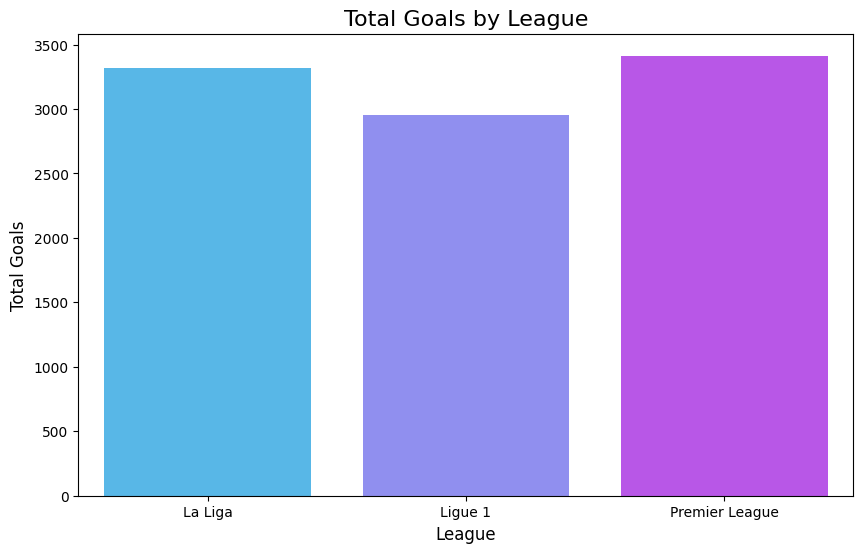

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='League', y='Total Goals', data=average_goals_all, palette='cool')
plt.title('Total Goals by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.show()

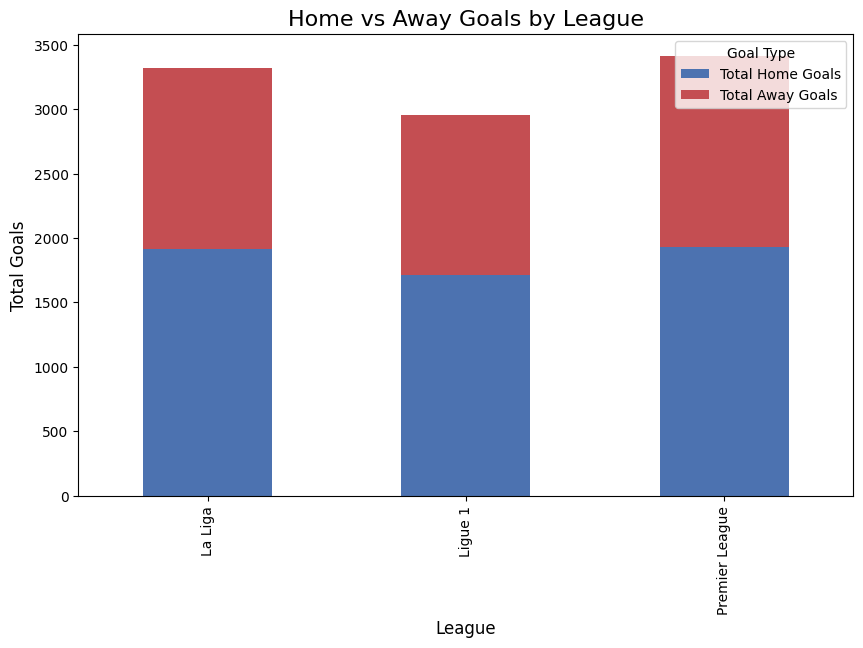

In [45]:
average_goals_all.set_index('League')[['Total Home Goals', 'Total Away Goals']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#c44e52'])
plt.title('Home vs Away Goals by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.legend(loc='upper right', title='Goal Type')
plt.show()

## 3. Pattern and Dependency Analysis

In [55]:
corr_df= pd.merge(corners_all_matches,(pd.merge(shots_all_matches, goals_all_matches, on='RBallID', how='outer')), on='RBallID', how='outer')
corr_df.head()

,RBallID,Corners,Shots on Target,Goals
0,849137,13,7,7
1,849138,6,4,6
2,849139,13,12,7
3,849140,21,7,3
4,849141,13,5,1


In [57]:
correlation_matrix = corr_df[['Corners', 'Shots on Target', 'Goals']].corr(method='pearson') 
print("Pearson Correlation Matrix:\n", correlation_matrix)

Pearson Correlation Matrix:
                   Corners  Shots on Target     Goals
Corners          1.000000         0.246896 -0.001765
Shots on Target  0.246896         1.000000  0.010238
Goals           -0.001765         0.010238  1.000000


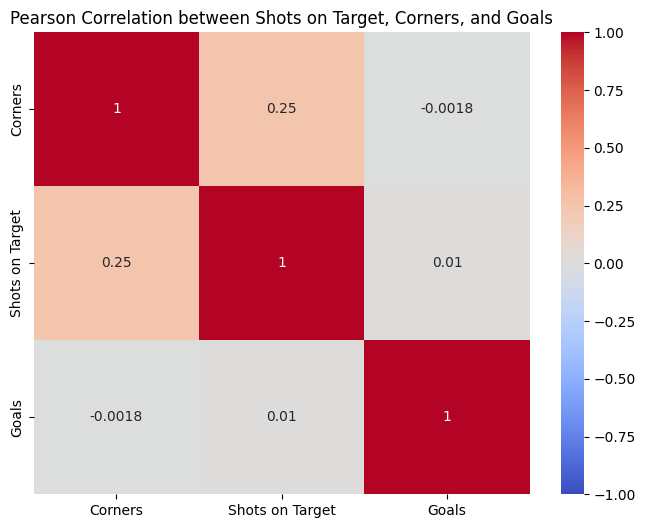

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation between Shots on Target, Corners, and Goals')
plt.show()


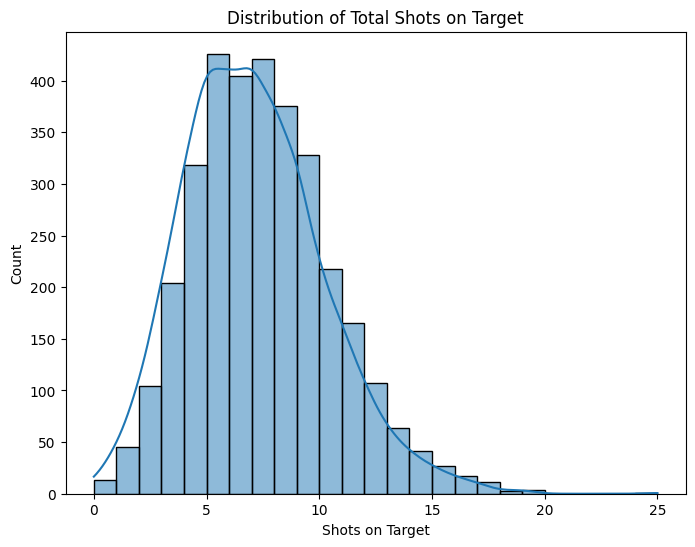

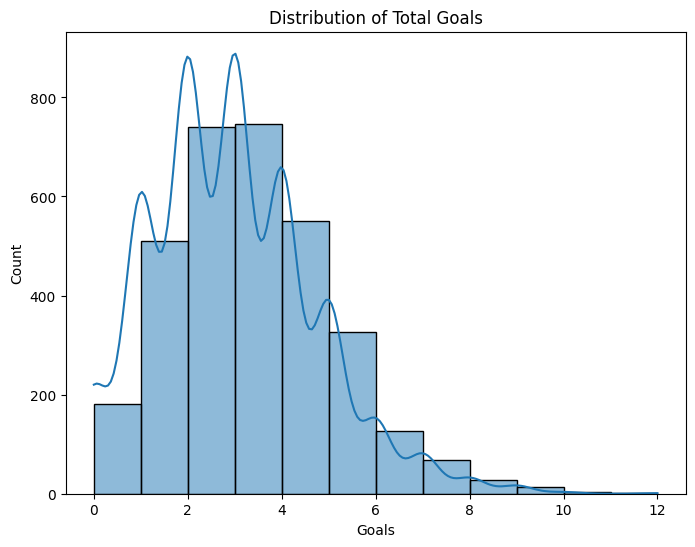

In [105]:
plt.figure(figsize=(8, 6)) 
sns.histplot(corr_df['Shots on Target'], bins=range(int(corr_df['Shots on Target'].min()), int(corr_df['Shots on Target'].max()) + 1, 1), kde=True) 
plt.title('Distribution of Total Shots on Target') 
plt.show() 

plt.figure(figsize=(8, 6)) 
sns.histplot(corr_df['Goals'], bins=range(int(corr_df['Goals'].min()), int(corr_df['Goals'].max()) + 1, 1), kde=True) 
plt.title('Distribution of Total Goals')
plt.show()

In [81]:
corr_df['Conversion Rate'] = corr_df['Goals'] / corr_df['Shots on Target'].replace(0, np.nan)
print(corr_df['Conversion Rate'].describe())

count    3283.000000
mean        0.533256
std         0.513534
min         0.000000
25%         0.222222
50%         0.400000
75%         0.666667
max         7.000000
Name: Conversion Rate, dtype: float64


In [98]:

home_goals = combined_df[combined_df['Incident'] == 'GOAL1'].groupby('RBallID').size().reset_index(name='Home Goals')
away_goals = combined_df[combined_df['Incident'] == 'GOAL2'].groupby('RBallID').size().reset_index(name='Away Goals')


goal_summary = pd.merge(home_goals, away_goals, on='RBallID', how='outer')
goal_summary.fillna(0, inplace=True)
goal_summary['Total Goals'] = goal_summary['Home Goals'] + goal_summary['Away Goals']


home_shots_on_target = combined_df[combined_df['Incident'] == 'SHG1'].groupby('RBallID').size().reset_index(name='Home Shots on Target')
away_shots_on_target = combined_df[combined_df['Incident'] == 'SHG2'].groupby('RBallID').size().reset_index(name='Away Shots on Target')

shots_on_target_summary = pd.merge(home_shots_on_target, away_shots_on_target, on='RBallID', how='outer')
shots_on_target_summary.fillna(0, inplace=True)
shots_on_target_summary['Total Shots on Target'] = shots_on_target_summary['Home Shots on Target'] + shots_on_target_summary['Away Shots on Target']

home_corners = combined_df[combined_df['Incident'] == 'CR1'].groupby('RBallID').size().reset_index(name='Home Corners')
away_corners = combined_df[combined_df['Incident'] == 'CR2'].groupby('RBallID').size().reset_index(name='Away Corners')

corners_summary = pd.merge(home_corners, away_corners, on='RBallID', how='outer')
corners_summary.fillna(0, inplace=True)
corners_summary['Total Corners'] = corners_summary['Home Corners'] + corners_summary['Away Corners']

final_summary = pd.merge(goal_summary, shots_on_target_summary, on='RBallID', how='outer')
final_summary = pd.merge(final_summary, corners_summary, on='RBallID', how='outer')

final_summary.fillna(0, inplace=True)

print(final_summary)

      RBallID  Home Goals  Away Goals  Total Goals  Home Shots on Target  \
0      849137         4.0         3.0          7.0                   6.0   
1      849138         3.0         3.0          6.0                   2.0   
2      849139         3.0         4.0          7.0                  10.0   
3      849140         0.0         3.0          3.0                   3.0   
4      849141         1.0         0.0          1.0                   3.0   
...       ...         ...         ...          ...                   ...   
3282  1299236         0.0         3.0          3.0                   4.0   
3283  1299237         5.0         1.0          6.0                   8.0   
3284  1299238         1.0         3.0          4.0                   1.0   
3285  1299239         3.0         1.0          4.0                   1.0   
3286  1299240         1.0         1.0          2.0                   0.0   

      Away Shots on Target  Total Shots on Target  Home Corners  Away Corners  \
0     

In [97]:
correlation_matrix = final_summary[['Home Corners', 'Away Corners', 'Total Corners', 'Home Shots on Target',
                                    'Away Shots on Target', 'Total Shots on Target', 'Home Goals', 'Away Goals', 'Total Goals']].corr(method='pearson') 

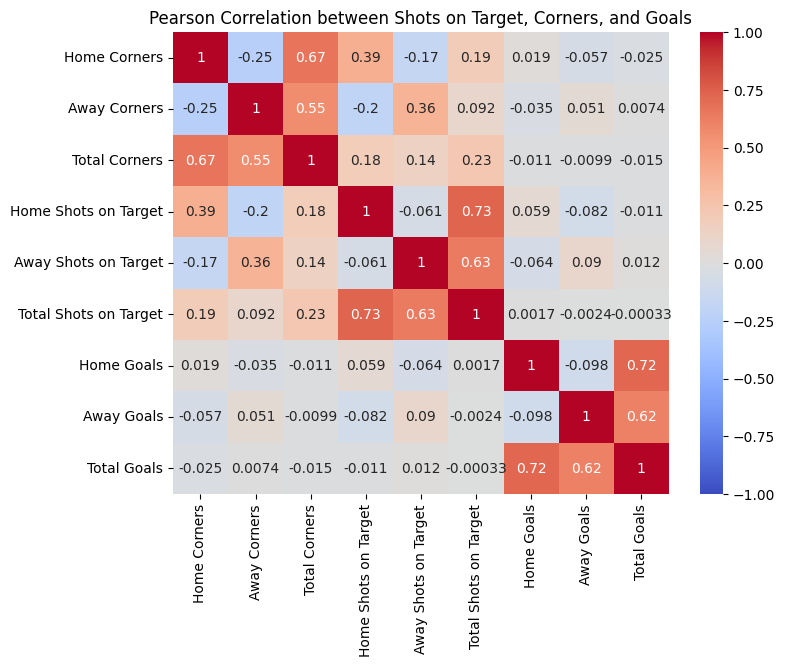

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation between Shots on Target, Corners, and Goals')
plt.show()

## 4. Distribution Fitting

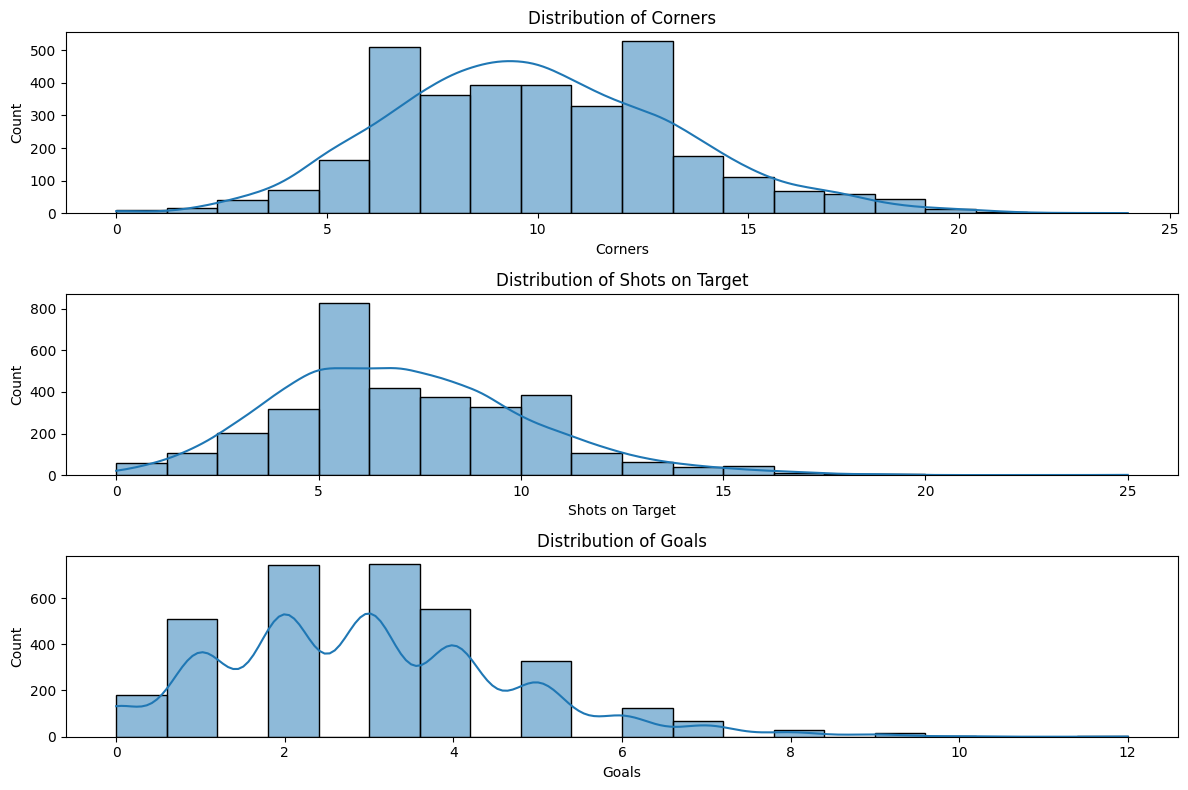

In [102]:


# Assume df_corners, df_shots_on_target, df_goals are the dataframes for the three statistics
plt.figure(figsize=(12, 8))

# Plot histograms for Corners
plt.subplot(3, 1, 1)
sns.histplot(corr_df['Corners'], kde=True, bins=20)
plt.title("Distribution of Corners")

# Plot histograms for Shots on Target
plt.subplot(3, 1, 2)
sns.histplot(corr_df['Shots on Target'], kde=True, bins=20)
plt.title("Distribution of Shots on Target")

# Plot histograms for Goals
plt.subplot(3, 1, 3)
sns.histplot(corr_df['Goals'], kde=True, bins=20)
plt.title("Distribution of Goals")

plt.tight_layout()
plt.show()


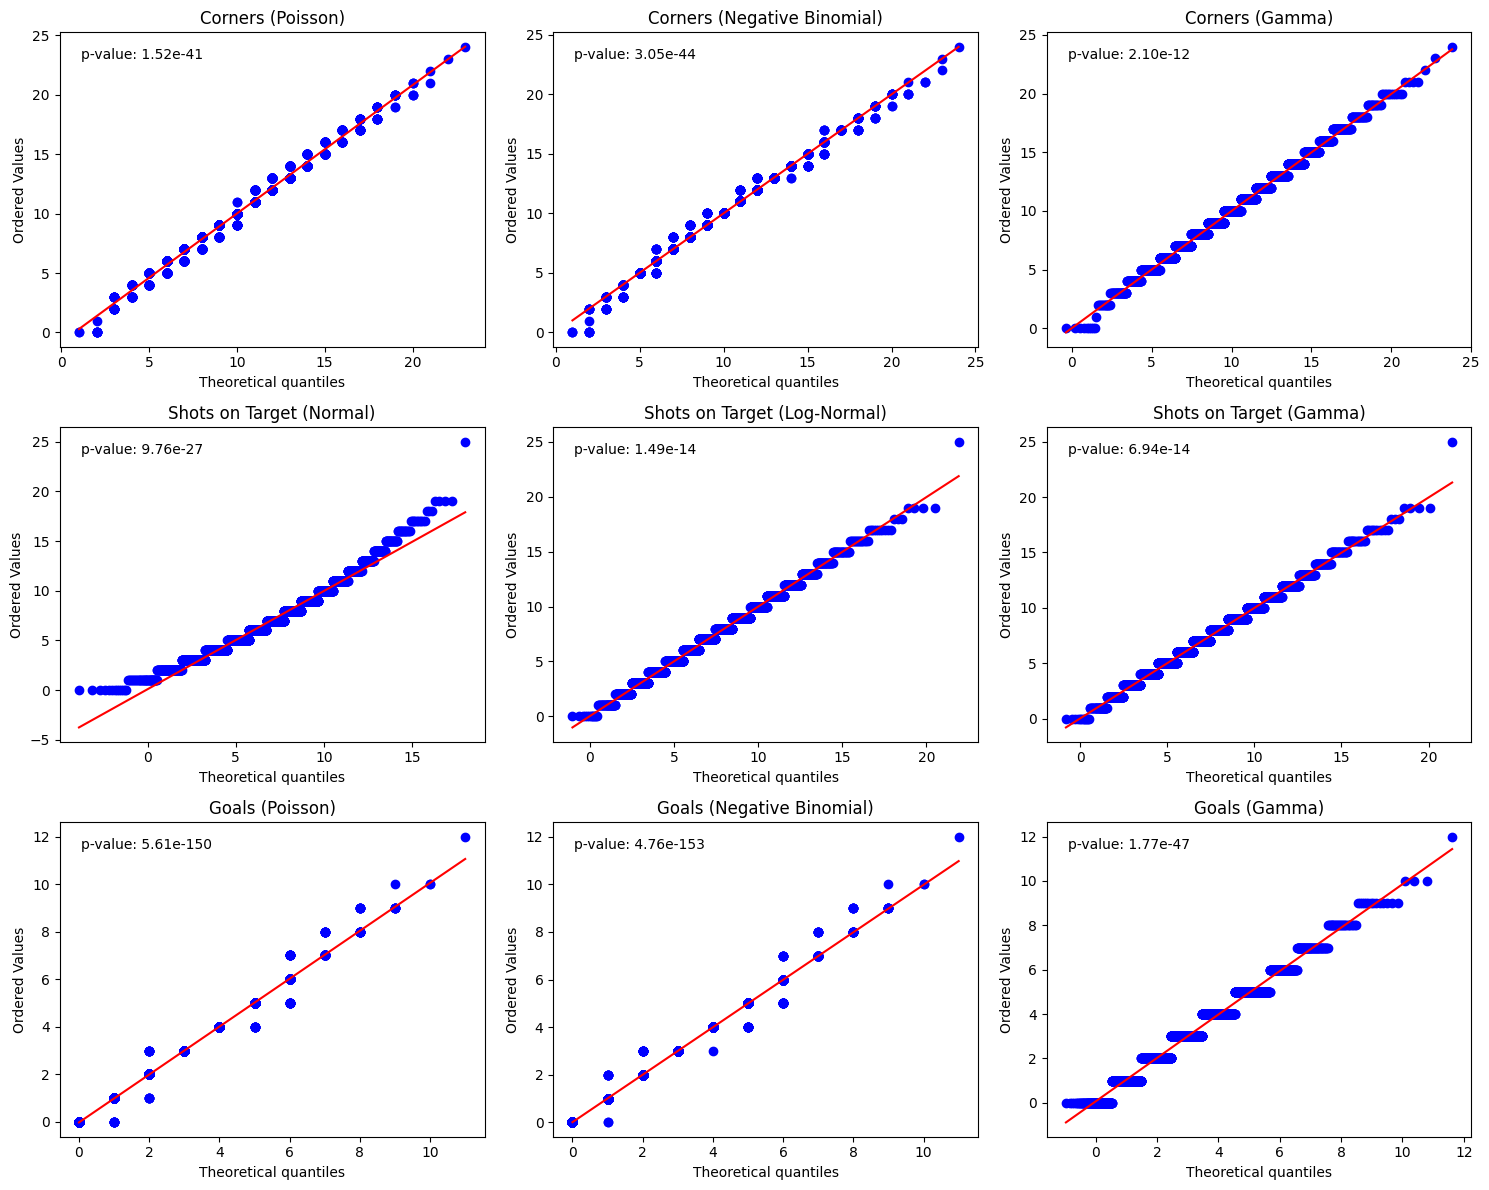

In [132]:
data_corners = corr_df['Corners']
data_shots = corr_df['Shots on Target']
data_goals = corr_df['Goals']


# Function to add p-value to Q-Q plots
def add_pvalue_text(ax, p_value):
    ax.text(0.05, 0.95, f'p-value: {p_value:.2e}', transform=ax.transAxes, verticalalignment='top')

# Manually estimate Negative Binomial parameters (n, p)
def estimate_nbinom_params(data):
    mean_data = np.mean(data)
    var_data = np.var(data)
    p = mean_data / var_data
    n = mean_data ** 2 / (var_data - mean_data)
    return n, p

# Fit parameters for each distribution and calculate p-values using K-S test

# Corners (Poisson, Negative Binomial, Gamma)
poisson_params_corners = (np.mean(data_corners),)  # Poisson uses lambda (mean)
n_corners, p_corners = estimate_nbinom_params(data_corners)
gamma_params_corners = stats.gamma.fit(data_corners)

ks_poisson_corners = stats.kstest(data_corners, 'poisson', poisson_params_corners)
ks_neg_binom_corners = stats.kstest(data_corners, 'nbinom', (n_corners, p_corners))
ks_gamma_corners = stats.kstest(data_corners, 'gamma', gamma_params_corners)

# Shots on Target (Normal, Log-Normal, Gamma)
normal_params_shots = stats.norm.fit(data_shots)
lognorm_params_shots = stats.lognorm.fit(data_shots)
gamma_params_shots = stats.gamma.fit(data_shots)

ks_normal_shots = stats.kstest(data_shots, 'norm', normal_params_shots)
ks_lognorm_shots = stats.kstest(data_shots, 'lognorm', lognorm_params_shots)
ks_gamma_shots = stats.kstest(data_shots, 'gamma', gamma_params_shots)

# Goals (Poisson, Negative Binomial, Gamma)
poisson_params_goals = (np.mean(data_goals),)  # Poisson uses lambda (mean)
n_goals, p_goals = estimate_nbinom_params(data_goals)
gamma_params_goals = stats.gamma.fit(data_goals)

ks_poisson_goals = stats.kstest(data_goals, 'poisson', poisson_params_goals)
ks_neg_binom_goals = stats.kstest(data_goals, 'nbinom', (n_goals, p_goals))
ks_gamma_goals = stats.kstest(data_goals, 'gamma', gamma_params_goals)

# Q-Q plots for all distributions
plt.figure(figsize=(15, 12))

# Corners - Poisson
plt.subplot(3, 3, 1)
stats.probplot(data_corners, dist="poisson", sparams=poisson_params_corners, plot=plt)
plt.title('Corners (Poisson)')
add_pvalue_text(plt.gca(), ks_poisson_corners.pvalue)

# Corners - Negative Binomial
plt.subplot(3, 3, 2)
stats.probplot(data_corners, dist="nbinom", sparams=(n_corners, p_corners), plot=plt)
plt.title('Corners (Negative Binomial)')
add_pvalue_text(plt.gca(), ks_neg_binom_corners.pvalue)

# Corners - Gamma
plt.subplot(3, 3, 3)
stats.probplot(data_corners, dist="gamma", sparams=gamma_params_corners, plot=plt)
plt.title('Corners (Gamma)')
add_pvalue_text(plt.gca(), ks_gamma_corners.pvalue)

# Shots on Target - Normal
plt.subplot(3, 3, 4)
stats.probplot(data_shots, dist="norm", sparams=normal_params_shots, plot=plt)
plt.title('Shots on Target (Normal)')
add_pvalue_text(plt.gca(), ks_normal_shots.pvalue)

# Shots on Target - Log-Normal
plt.subplot(3, 3, 5)
stats.probplot(data_shots, dist="lognorm", sparams=lognorm_params_shots, plot=plt)
plt.title('Shots on Target (Log-Normal)')
add_pvalue_text(plt.gca(), ks_lognorm_shots.pvalue)

# Shots on Target - Gamma
plt.subplot(3, 3, 6)
stats.probplot(data_shots, dist="gamma", sparams=gamma_params_shots, plot=plt)
plt.title('Shots on Target (Gamma)')
add_pvalue_text(plt.gca(), ks_gamma_shots.pvalue)

# Goals - Poisson
plt.subplot(3, 3, 7)
stats.probplot(data_goals, dist="poisson", sparams=poisson_params_goals, plot=plt)
plt.title('Goals (Poisson)')
add_pvalue_text(plt.gca(), ks_poisson_goals.pvalue)

# Goals - Negative Binomial
plt.subplot(3, 3, 8)
stats.probplot(data_goals, dist="nbinom", sparams=(n_goals, p_goals), plot=plt)
plt.title('Goals (Negative Binomial)')
add_pvalue_text(plt.gca(), ks_neg_binom_goals.pvalue)

# Goals - Gamma
plt.subplot(3, 3, 9)
stats.probplot(data_goals, dist="gamma", sparams=gamma_params_goals, plot=plt)
plt.title('Goals (Gamma)')
add_pvalue_text(plt.gca(), ks_gamma_goals.pvalue)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## 5. Team Behavior

In [139]:
relevant_incidents = combined_df[combined_df['Incident'].isin(['GOAL1', 'GOAL2', 'SHG1', 'SHG2', 'SHB1', 'SHB2', 'CR1', 'CR2'])]
score_data = []

for match_id, match_data in relevant_incidents.groupby('RBallID'):
    home_goals, away_goals = 0, 0
    match_progress = []
    
    for index, row in match_data.iterrows():
        if row['Incident'] == 'GOAL1':
            home_goals += 1
        elif row['Incident'] == 'GOAL2':
            away_goals += 1
        
        match_progress.append({
            "HomeTeam": row["HomeTeam"],
            "AwayTeam": row["AwayTeam"],
            'Incident': row['Incident'],
            'HomeGoals': home_goals,
            'AwayGoals': away_goals })
       
    
    score_data.append(pd.DataFrame(match_progress))

score_progress_df = pd.concat(score_data, ignore_index=True)
score_progress_df

,HomeTeam,AwayTeam,Incident,HomeGoals,AwayGoals
0,Arsenal FC,Leicester City FC,GOAL1,1,0
1,Arsenal FC,Leicester City FC,SHB2,1,0
2,Arsenal FC,Leicester City FC,CR2,1,0
3,Arsenal FC,Leicester City FC,GOAL2,1,1
4,Arsenal FC,Leicester City FC,SHB1,1,1
...,...,...,...,...,...
97352,West Ham United FC,Aston Villa FC,GOAL2,0,1
97353,West Ham United FC,Aston Villa FC,GOAL1,1,1
97354,West Ham United FC,Aston Villa FC,SHB2,1,1
97355,West Ham United FC,Aston Villa FC,CR2,1,1


In [140]:
score_progress_df['HomeTeam_Status'] = score_progress_df.apply(lambda row: 'ahead' if row['HomeGoals'] > row['AwayGoals'] 
                                 else 'behind' if row['HomeGoals'] < row['AwayGoals'] 
                                 else 'draw', axis=1)

score_progress_df['AwayTeam_Status'] = score_progress_df.apply(lambda row: 'ahead' if row['AwayGoals'] > row['HomeGoals'] 
                                 else 'behind' if row['AwayGoals'] < row['HomeGoals'] 
                                 else 'draw', axis=1)
score_progress_df

,HomeTeam,AwayTeam,Incident,HomeGoals,AwayGoals,HomeTeam_Status,AwayTeam_Status
0,Arsenal FC,Leicester City FC,GOAL1,1,0,ahead,behind
1,Arsenal FC,Leicester City FC,SHB2,1,0,ahead,behind
2,Arsenal FC,Leicester City FC,CR2,1,0,ahead,behind
3,Arsenal FC,Leicester City FC,GOAL2,1,1,draw,draw
4,Arsenal FC,Leicester City FC,SHB1,1,1,draw,draw
...,...,...,...,...,...,...,...
97352,West Ham United FC,Aston Villa FC,GOAL2,0,1,behind,ahead
97353,West Ham United FC,Aston Villa FC,GOAL1,1,1,draw,draw
97354,West Ham United FC,Aston Villa FC,SHB2,1,1,draw,draw
97355,West Ham United FC,Aston Villa FC,CR2,1,1,draw,draw


In [143]:

# Assuming your dataset is in a DataFrame called df
# First, filter relevant incidents
relevant_incidents = ['GOAL1', 'GOAL2', 'CR1', 'CR2', 'SHG1', 'SHG2', 'SHB1', 'SHB2']

# Filter data based on relevant incidents
df_filtered = score_progress_df[score_progress_df['Incident'].isin(relevant_incidents)]

# Create a helper column to categorize incidents into actions (Goals, Corners, Shots on Target, Shots off Target)
def categorize_incident(incident):
    if 'GOAL' in incident:
        return 'Goals'
    elif 'CR' in incident:
        return 'Corners'
    elif 'SHG' in incident:
        return 'Shots_on_Target'
    elif 'SHB' in incident:
        return 'Shots_off_Target'
    return 'Other'

df_filtered['Action'] = df_filtered['Incident'].apply(categorize_incident)

# Now, we will group by HomeTeam, HomeTeam_Status, and the action type (Goals, Corners, Shots on Target, Shots off Target)
home_team_grouped = df_filtered.groupby(['HomeTeam', 'HomeTeam_Status', 'Action']).size().reset_index(name='Count')

# Similarly, for away team actions
away_team_grouped = df_filtered.groupby(['AwayTeam', 'AwayTeam_Status', 'Action']).size().reset_index(name='Count')

# Renaming the columns for clarity
home_team_grouped = home_team_grouped.rename(columns={'HomeTeam': 'Team', 'HomeTeam_Status': 'Status'})
away_team_grouped = away_team_grouped.rename(columns={'AwayTeam': 'Team', 'AwayTeam_Status': 'Status'})

# Combine home and away team data into a single DataFrame
combined_df = pd.concat([home_team_grouped, away_team_grouped])

# To pivot the data so we can see the counts of actions in different game states (behind, draw, ahead) side by side
# Pivoting the table and ensuring the aggregation function is sum
pivot_table = combined_df.pivot_table(
    index=['Team', 'Action'], 
    columns='Status', 
    values='Count', 
    aggfunc='sum',  # Ensure we're summing occurrences, not averaging
    fill_value=0
)



# The pivot_table will now show the comparison of actions in different statuses for each team
pivot_table


Status                                       ahead  behind  draw
Team                       Action                               
AFC Bournemouth            Corners             291     497   507
                           Goals               118     188    65
                           Shots_off_Target    233     407   434
                           Shots_on_Target     180     299   314
AS Monaco FC               Corners             271     234   498
...                                            ...     ...   ...
West Ham United FC         Shots_on_Target     200     262   329
Wolverhampton Wanderers FC Corners             188     206   329
                           Goals                79      81    38
                           Shots_off_Target    173     194   326
                           Shots_on_Target     108     129   216

[300 rows x 3 columns]


Status                                       ahead  behind  draw
Team                       Action                               
AFC Bournemouth            Corners             291     497   507
                           Goals               118     188    65
                           Shots_off_Target    233     407   434
                           Shots_on_Target     180     299   314
AS Monaco FC               Corners             271     234   498
...                                            ...     ...   ...
West Ham United FC         Shots_on_Target     200     262   329
Wolverhampton Wanderers FC Corners             188     206   329
                           Goals                79      81    38
                           Shots_off_Target    173     194   326
                           Shots_on_Target     108     129   216

[300 rows x 3 columns]

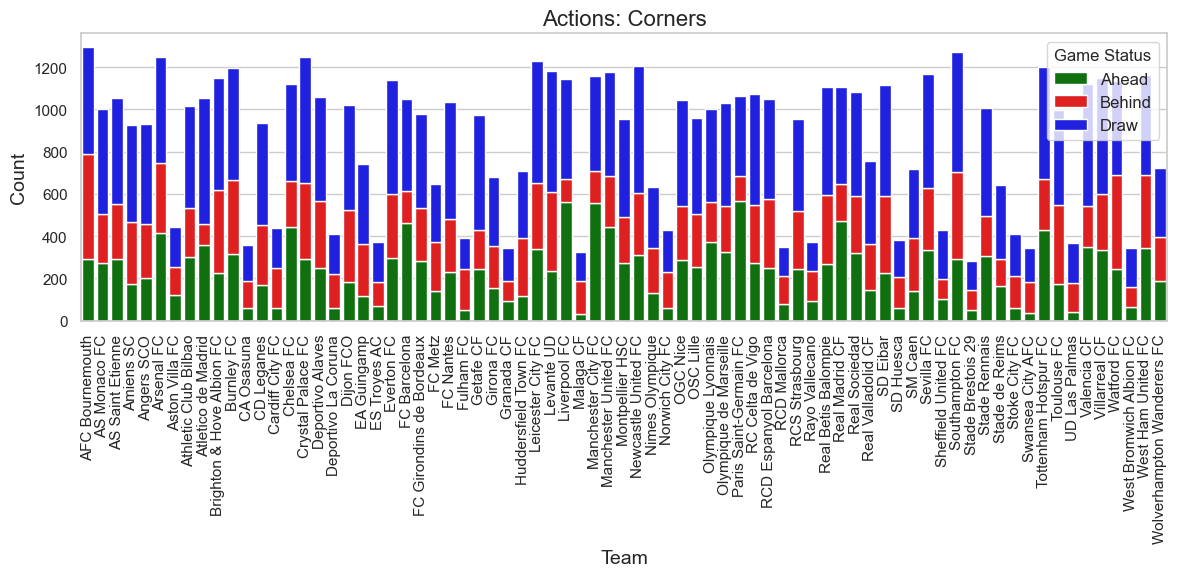

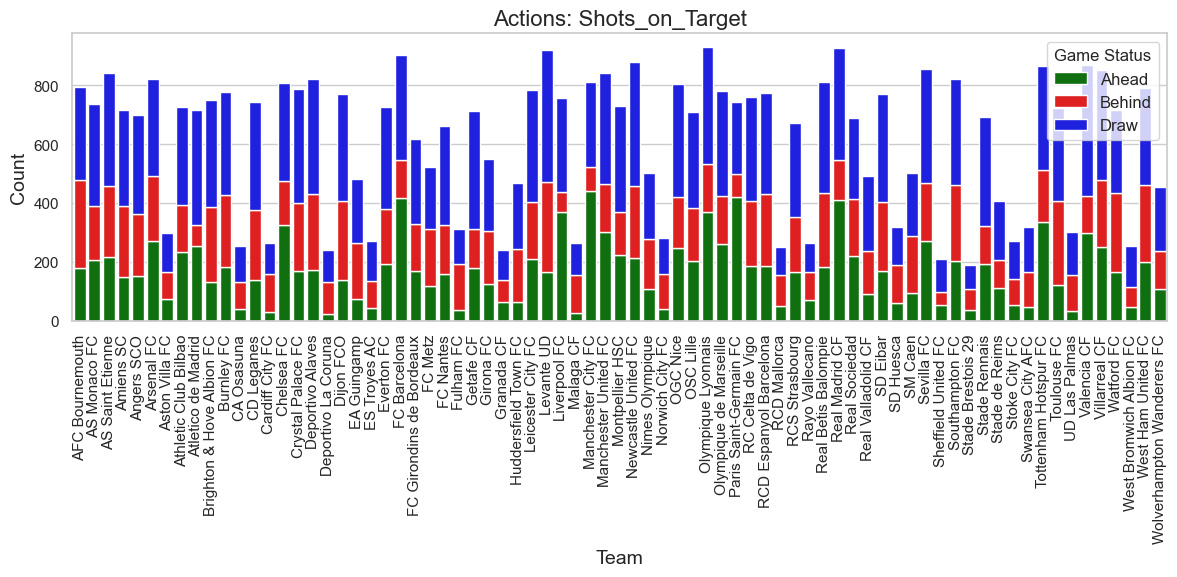

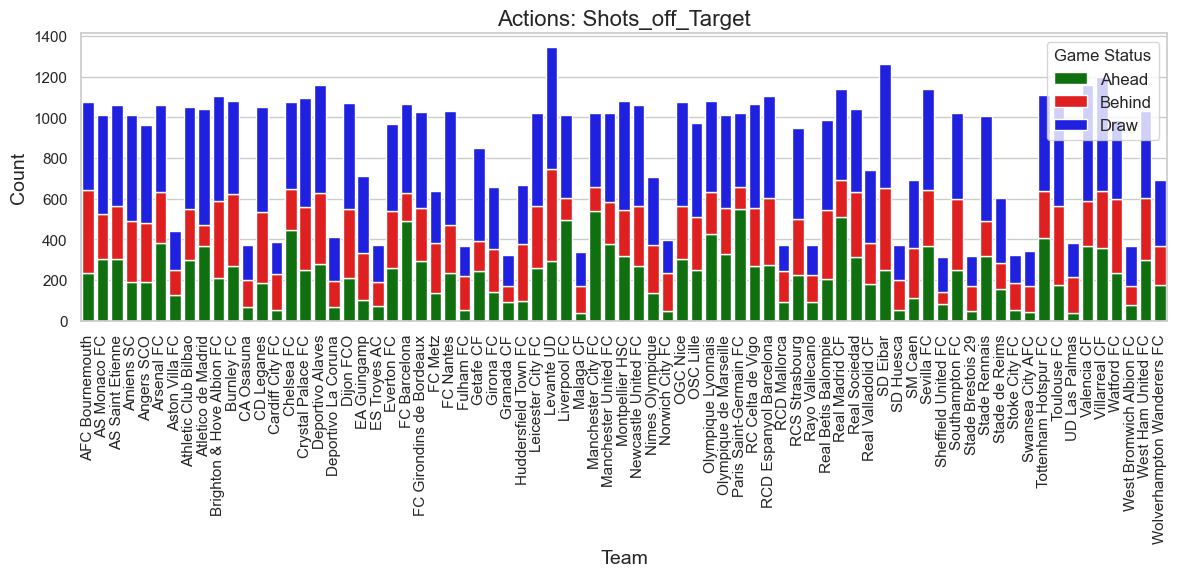

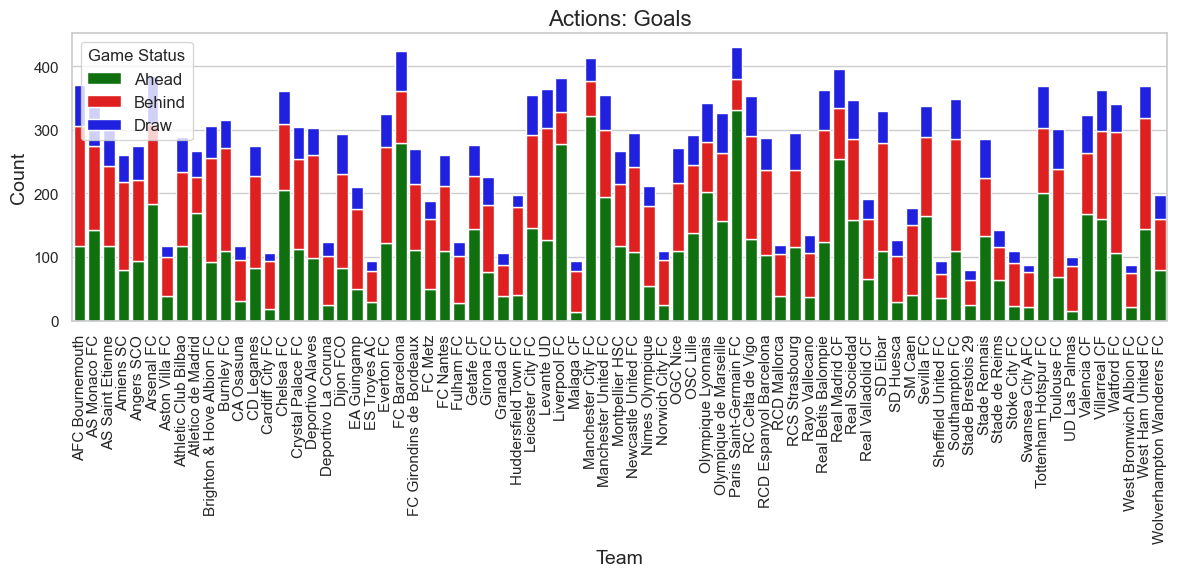

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the actions to plot
actions = ['Corners', 'Shots_on_Target', 'Shots_off_Target', 'Goals']

# Set the font size
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 16, 'axes.labelsize': 14, 'legend.fontsize': 12})

# Loop through each action and create a bar plot
for action in actions:
    # Filter the data for the specific action
    action_data = pivot_table_reset[pivot_table_reset['Action'] == action]
    
    # Create a new figure for each action
    plt.figure(figsize=(12, 6))
    
    # Create a barplot for the specific action
    sns.barplot(x='Team', y='ahead', data=action_data, color='green', label='Ahead')
    sns.barplot(x='Team', y='behind', data=action_data, color='red', label='Behind', bottom=action_data['ahead'])
    sns.barplot(x='Team', y='draw', data=action_data, color='blue', label='Draw', bottom=action_data['ahead'] + action_data['behind'])

    # Rotate the team names on x-axis for better visibility
    plt.xticks(rotation=90)
    
    # Set plot title and labels
    plt.title(f'Actions: {action}')
    plt.xlabel('Team')
    plt.ylabel('Count')

    # Add the legend
    plt.legend(title='Game Status')

    # Show the plot
    plt.tight_layout()
    plt.show()


## 6. Comparative Statistics

In [184]:
corners_df = combined_df[combined_df['Incident'].isin(['CR1', 'CR2'])]
corners_per_game = corners_df.groupby(['Season', 'RBallID']).size().reset_index(name='Corners')
corners_per_season = corners_per_game.groupby('Season')['Corners'].sum().reset_index(name='Total Corners')

#We can't use .mean() to find the average because that wouldn't take into account the games with no corners for either team.
games_per_season=combined_df.groupby('Season')['RBallID'].nunique().reset_index(name='Total Games')

corners_average = pd.merge(corners_per_season, games_per_season, on='Season')
corners_average['Corners Per Game']=corners_average['Total Corners']/corners_average['Total Games']

cr1_df = combined_df[combined_df['Incident'] == 'CR1']
cr2_df = combined_df[combined_df['Incident'] == 'CR2']

cr1_corners_per_game = cr1_df.groupby(['Season', 'RBallID']).size().reset_index(name='Home Corners')
home_corners_per_season = cr1_corners_per_game.groupby('Season')['Home Corners'].sum().reset_index(name='Total Home Corners')

cr2_corners_per_game = cr2_df.groupby(['Season', 'RBallID']).size().reset_index(name='Away Corners')
away_corners_per_season = cr2_corners_per_game.groupby('Season')['Away Corners'].sum().reset_index(name='Total Away Corners')

average_corners_all = pd.merge(home_corners_per_season,(pd.merge(away_corners_per_season, corners_average, on='Season', how='outer')), on='Season', how='outer')
average_corners_all['Home Corners Per Game']=average_corners_all['Total Home Corners']/average_corners_all['Total Games']
average_corners_all['Away Corners Per Game']=average_corners_all['Total Away Corners']/average_corners_all['Total Games']
average_corners_all

,Season,Total Home Corners,Total Away Corners,Total Corners,Total Games,Corners Per Game,Home Corners Per Game,Away Corners Per Game
0,2017-18,6266,4887,11153,1115,10.002691,5.619731,4.382960
1,2018-19,6303,4874,11177,1135,9.847577,5.553304,4.294273
2,2019-20,5576,4738,10314,1046,9.860421,5.330784,4.529637


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\3537362281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Corners', data=saverage_corners_all, palette='icefire')


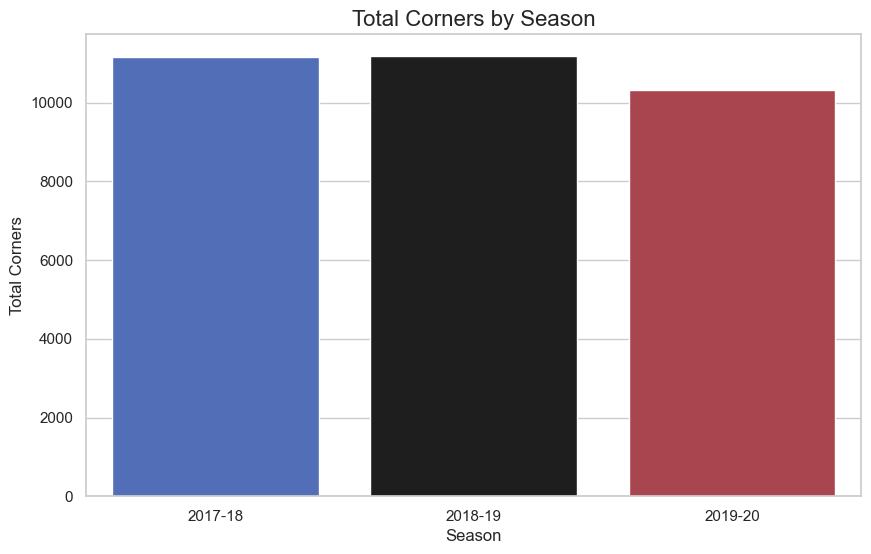

In [194]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Corners', data=saverage_corners_all, palette='icefire')
plt.title('Total Corners by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Corners', fontsize=12)
plt.show()

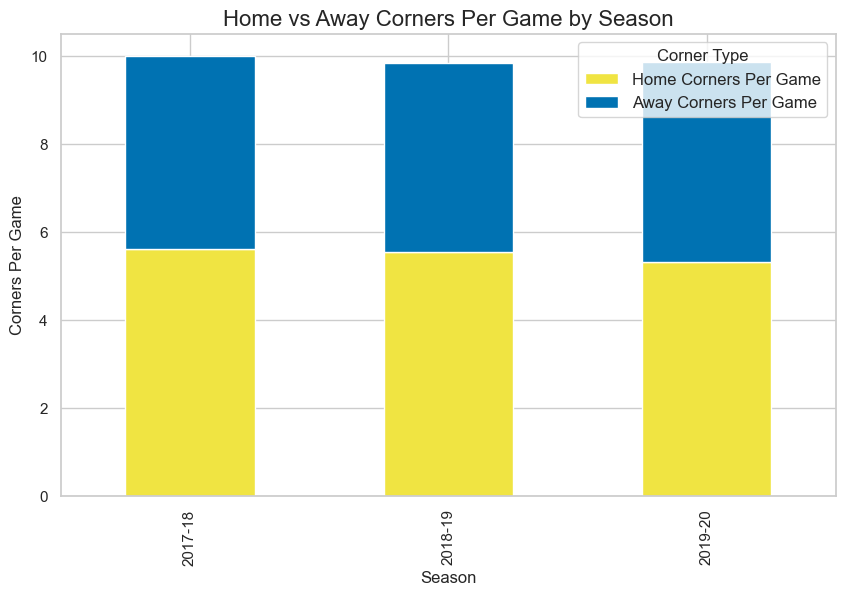

In [198]:
average_corners_all.set_index('Season')[['Home Corners Per Game', 'Away Corners Per Game']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#f0e442', '#0072b2'])
plt.title('Home vs Away Corners Per Game by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Corners Per Game', fontsize=12)
plt.legend(loc='upper right', title='Corner Type')
plt.show()

In [187]:
shots_df = combined_df[combined_df['Incident'].isin(['SHG1', 'SHG2'])]
shots_per_game = shots_df.groupby(['Season', 'RBallID']).size().reset_index(name='Shots')
shots_per_season = shots_per_game.groupby('Season')['Shots'].sum().reset_index(name='Total Shots on Target')

#We can't use .mean() to find the average because that wouldn't take into account the games with no corners for either team.
games_per_season=combined_df.groupby('Season')['RBallID'].nunique().reset_index(name='Total Games')

shots_average = pd.merge(shots_per_season, games_per_season, on='Season')
shots_average['Shots on Target Per Game']=shots_average['Total Shots on Target']/shots_average['Total Games']

shg1_df = combined_df[combined_df['Incident'] == 'SHG1']
shg2_df = combined_df[combined_df['Incident'] == 'SHG2']

shg1_shots_per_game = shg1_df.groupby(['Season', 'RBallID']).size().reset_index(name='Home Shots on Target')
home_shots_per_season = shg1_shots_per_game.groupby('Season')['Home Shots on Target'].sum().reset_index(name='Total Home Shots on Target')

shg2_shots_per_game = shg2_df.groupby(['Season', 'RBallID']).size().reset_index(name='Away Shots on Target')
away_shots_per_season = shg2_shots_per_game.groupby('Season')['Away Shots on Target'].sum().reset_index(name='Total Away Shots on Target')

average_shots_all = pd.merge(home_shots_per_season,(pd.merge(away_shots_per_season, shots_average, on='Season', how='outer')), on='Season', how='outer')
average_shots_all['Home Shots on Target Per Game']=average_shots_all['Total Home Shots on Target']/average_shots_all['Total Games']
average_shots_all['Away Shots on Target Per Game']=average_shots_all['Total Away Shots on Target']/average_shots_all['Total Games']
average_shots_all

,Season,Total Home Shots on Target,Total Away Shots on Target,Total Shots on Target,Total Games,Shots on Target Per Game,Home Shots on Target Per Game,Away Shots on Target Per Game
0,2017-18,4502,3658,8160,1115,7.318386,4.037668,3.280717
1,2018-19,4553,3510,8063,1135,7.103965,4.011454,3.092511
2,2019-20,3793,3278,7071,1046,6.760038,3.626195,3.133843


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\4191396637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Shots on Target', data=average_shots_all, palette='icefire')


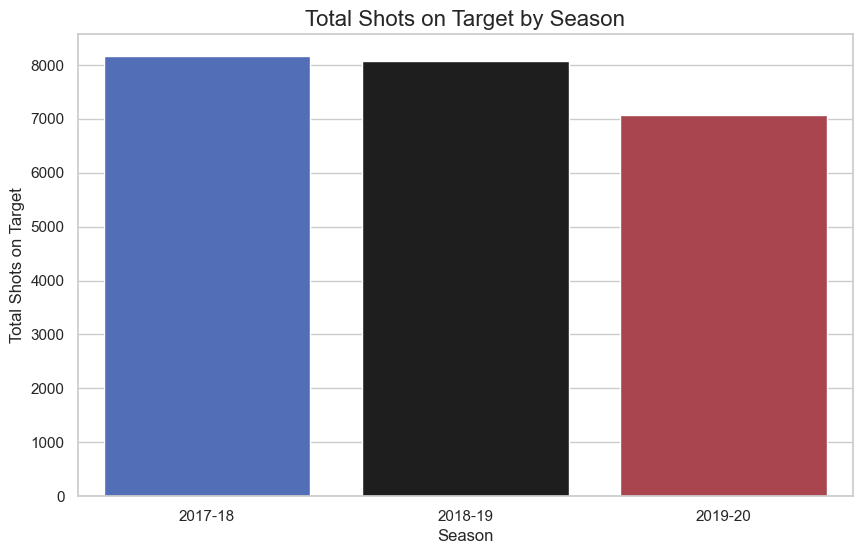

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Shots on Target', data=average_shots_all, palette='icefire')
plt.title('Total Shots on Target by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Shots on Target', fontsize=12)
plt.show()

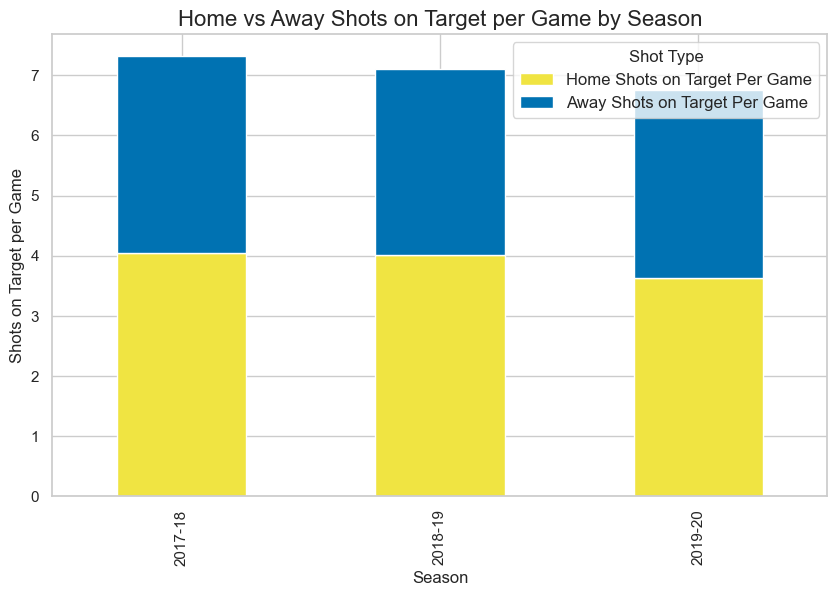

In [201]:
average_shots_all.set_index('Season')[['Home Shots on Target Per Game', 'Away Shots on Target Per Game']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#f0e442', '#0072b2'])
plt.title('Home vs Away Shots on Target per Game by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Shots on Target per Game', fontsize=12)
plt.legend(loc='upper right', title='Shot Type')
plt.show()

In [190]:
goals_df = combined_df[combined_df['Incident'].isin(['GOAL1', 'GOAL2'])]
goals_per_game = goals_df.groupby(['Season', 'RBallID']).size().reset_index(name='Goals')
goals_per_season = goals_per_game.groupby('Season')['Goals'].sum().reset_index(name='Total Goals')

#We can't use .mean() to find the average because that wouldn't take into account the games with no corners for either team.
games_per_seasone=combined_df.groupby('Season')['RBallID'].nunique().reset_index(name='Total Games')

goals_average = pd.merge(goals_per_season, games_per_season, on='Season')
goals_average['Goals Per Game']=goals_average['Total Goals']/goals_average['Total Games']

goals1_df = combined_df[combined_df['Incident'] == 'GOAL1']
goals2_df = combined_df[combined_df['Incident'] == 'GOAL2']

goals1_goals_per_game = goals1_df.groupby(['Season', 'RBallID']).size().reset_index(name='Home Goals')
home_goals_per_season = goals1_goals_per_game.groupby('Season')['Home Goals'].sum().reset_index(name='Total Home Goals')

goals2_goals_per_game = goals2_df.groupby(['Season', 'RBallID']).size().reset_index(name='Away Goals')
away_goals_per_season = goals2_goals_per_game.groupby('Season')['Away Goals'].sum().reset_index(name='Total Away Goals')

average_goals_all = pd.merge(home_goals_per_season,(pd.merge(away_goals_per_season, goals_average, on='Season', how='outer')), on='Season', how='outer')
average_goals_all['Home Goals Per Game']=average_goals_all['Total Home Goals']/average_goals_all['Total Games']
average_goals_all['Away Goals Per Game']=average_goals_all['Total Away Goals']/average_goals_all['Total Games']
average_goals_all

,Season,Total Home Goals,Total Away Goals,Total Goals,Total Games,Goals Per Game,Home Goals Per Game,Away Goals Per Game
0,2017-18,1862,1366,3228,1115,2.895067,1.669955,1.225112
1,2018-19,1903,1438,3341,1135,2.943612,1.676652,1.266960
2,2019-20,1791,1325,3116,1046,2.978967,1.712237,1.266730


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\191419225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Goals', data=average_goals_all, palette='icefire')


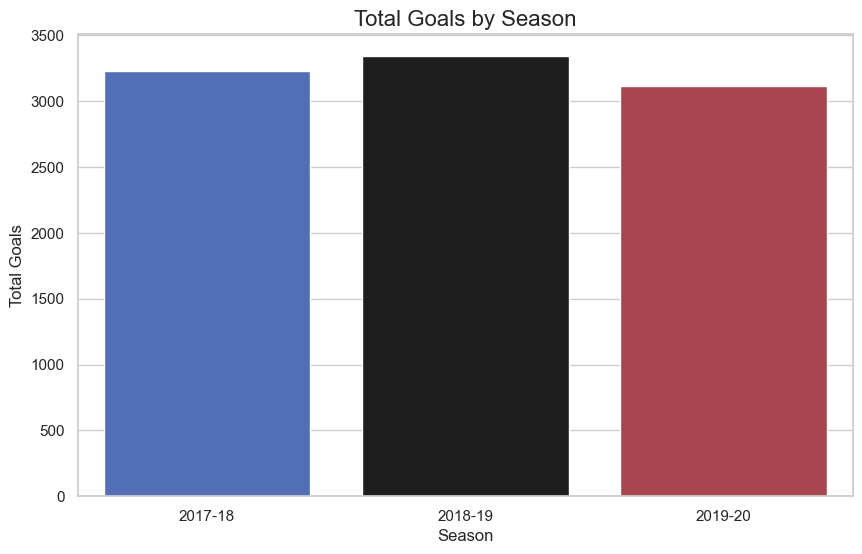

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Goals', data=average_goals_all, palette='icefire')
plt.title('Total Goals by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.show()

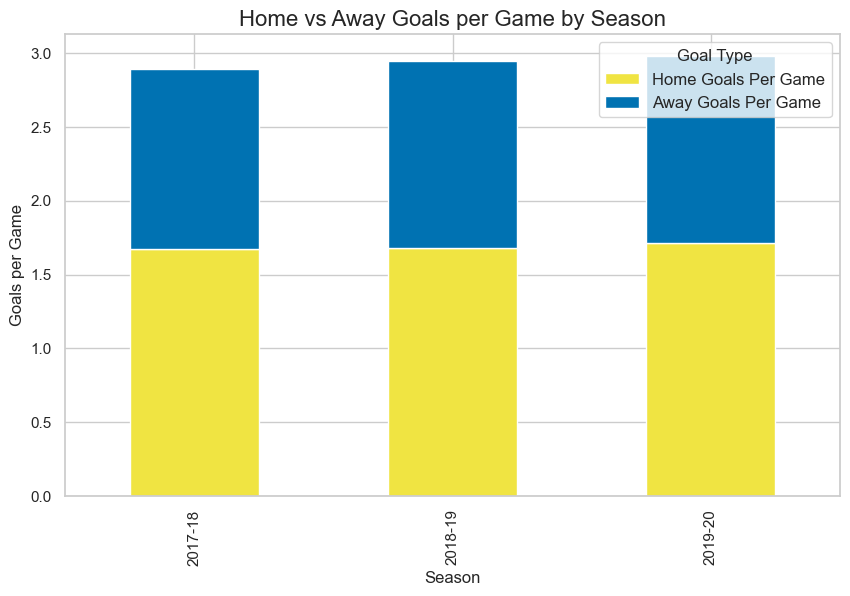

In [202]:
average_goals_all.set_index('Season')[['Home Goals Per Game', 'Away Goals Per Game']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#f0e442', '#0072b2'])
plt.title('Home vs Away Goals per Game by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel( 'Goals per Game', fontsize=12)
plt.legend(loc='upper right', title='Goal Type')
plt.show()

In [160]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 1000]  
labels = ['1\'-10\'', '11\'-20\'', '21\'-30\'', '31\'-40\'', '41\'-50\'', '51\'-60\'', '61\'-70\'', '71\'-80\'', '81\'-90\'+']

corners_df.loc[:, '10-minute Period'] = pd.cut(corners_df['Minute'], bins=bins, labels=labels, right=False, include_lowest=True)

corners_df.head()

,RBallID,HomeTeam,AwayTeam,Timestamp,Incident,IncidentNumber,Minute,League,Season,10-minute Period,Half
160,860270,CD Leganes,Deportivo Alaves,08/18/2017 18:32:53,CR2,166,18,La Liga,2017-18,11'-20',First Half
356,860270,CD Leganes,Deportivo Alaves,08/18/2017 18:52:15,CR1,370,38,La Liga,2017-18,31'-40',First Half
402,860270,CD Leganes,Deportivo Alaves,08/18/2017 18:58:39,CR2,418,44,La Liga,2017-18,41'-50',First Half
411,860270,CD Leganes,Deportivo Alaves,08/18/2017 18:59:45,CR1,427,45,La Liga,2017-18,41'-50',First Half
453,860270,CD Leganes,Deportivo Alaves,08/18/2017 19:20:49,CR1,469,50,La Liga,2017-18,51'-60',Second Half


In [161]:
corners_per_10_league = corners_df.groupby(['League', '10-minute Period']).size().reset_index(name='Total Corners')
corners_per_10_league

,League,10-minute Period,Total Corners
0,La Liga,1'-10',975
1,La Liga,11'-20',1122
2,La Liga,21'-30',1116
3,La Liga,31'-40',1120
4,La Liga,41'-50',1319
5,La Liga,51'-60',1202
6,La Liga,61'-70',1121
7,La Liga,71'-80',1073
8,La Liga,81'-90'+,1736
9,Ligue 1,1'-10',793


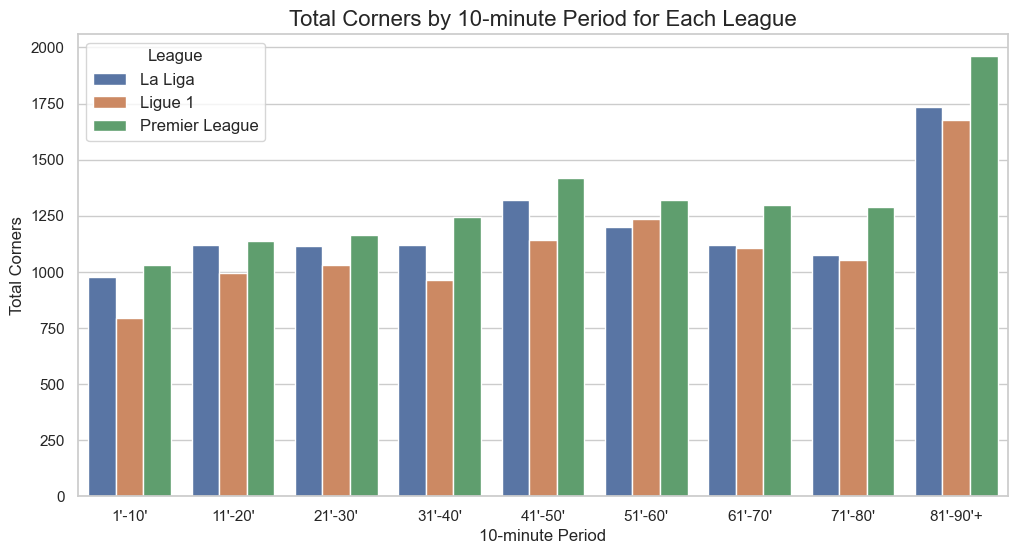

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(x='10-minute Period', y='Total Corners', hue='League', data=corners_per_10_league)

plt.title('Total Corners by 10-minute Period for Each League', fontsize=16)
plt.xlabel('10-minute Period', fontsize=12)
plt.ylabel('Total Corners', fontsize=12)

plt.show()


In [163]:
corners_per_10_season = corners_df.groupby(['Season', '10-minute Period']).size().reset_index(name='Total Corners')
corners_per_10_season

,Season,10-minute Period,Total Corners
0,2017-18,1'-10',937
1,2017-18,11'-20',1112
2,2017-18,21'-30',1143
3,2017-18,31'-40',1194
4,2017-18,41'-50',1257
5,2017-18,51'-60',1291
6,2017-18,61'-70',1215
7,2017-18,71'-80',1198
8,2017-18,81'-90'+,1806
9,2018-19,1'-10',948


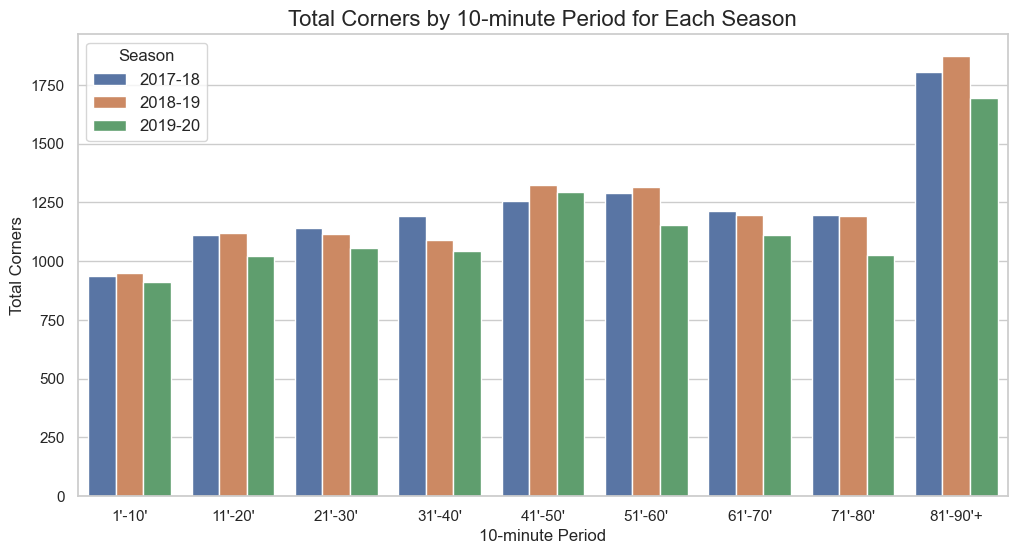

In [164]:
plt.figure(figsize=(12, 6))
sns.barplot(x='10-minute Period', y='Total Corners', hue='Season', data=corners_per_10_season)

plt.title('Total Corners by 10-minute Period for Each Season', fontsize=16)
plt.xlabel('10-minute Period', fontsize=12)
plt.ylabel('Total Corners', fontsize=12)

plt.show()

In [167]:
home_corners = corners_df[corners_df['Incident'] == 'CR1'].groupby('HomeTeam').size().reset_index(name='HomeCorners')
away_corners = corners_df[corners_df['Incident'] == 'CR2'].groupby('AwayTeam').size().reset_index(name='AwayCorners')

home_corners.rename(columns={'HomeTeam': 'Team'}, inplace=True)
away_corners.rename(columns={'AwayTeam': 'Team'}, inplace=True)

total_corners = pd.merge(home_corners, away_corners, on='Team', how='outer')
total_corners.fillna(0, inplace=True)

total_corners['TotalCorners'] = total_corners['HomeCorners'] + total_corners['AwayCorners']
total_corners



,Team,HomeCorners,AwayCorners,TotalCorners
0,AFC Bournemouth,314,290,604
1,AS Monaco FC,282,241,523
2,AS Saint Etienne,296,244,540
3,Amiens SC,212,174,386
4,Angers SCO,265,214,479
...,...,...,...,...
70,Villarreal CF,284,210,494
71,Watford FC,266,259,525
72,West Bromwich Albion FC,95,75,170
73,West Ham United FC,297,236,533


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\2815762834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalCorners', y='Team', data=total_corners_sorted, palette='cool')


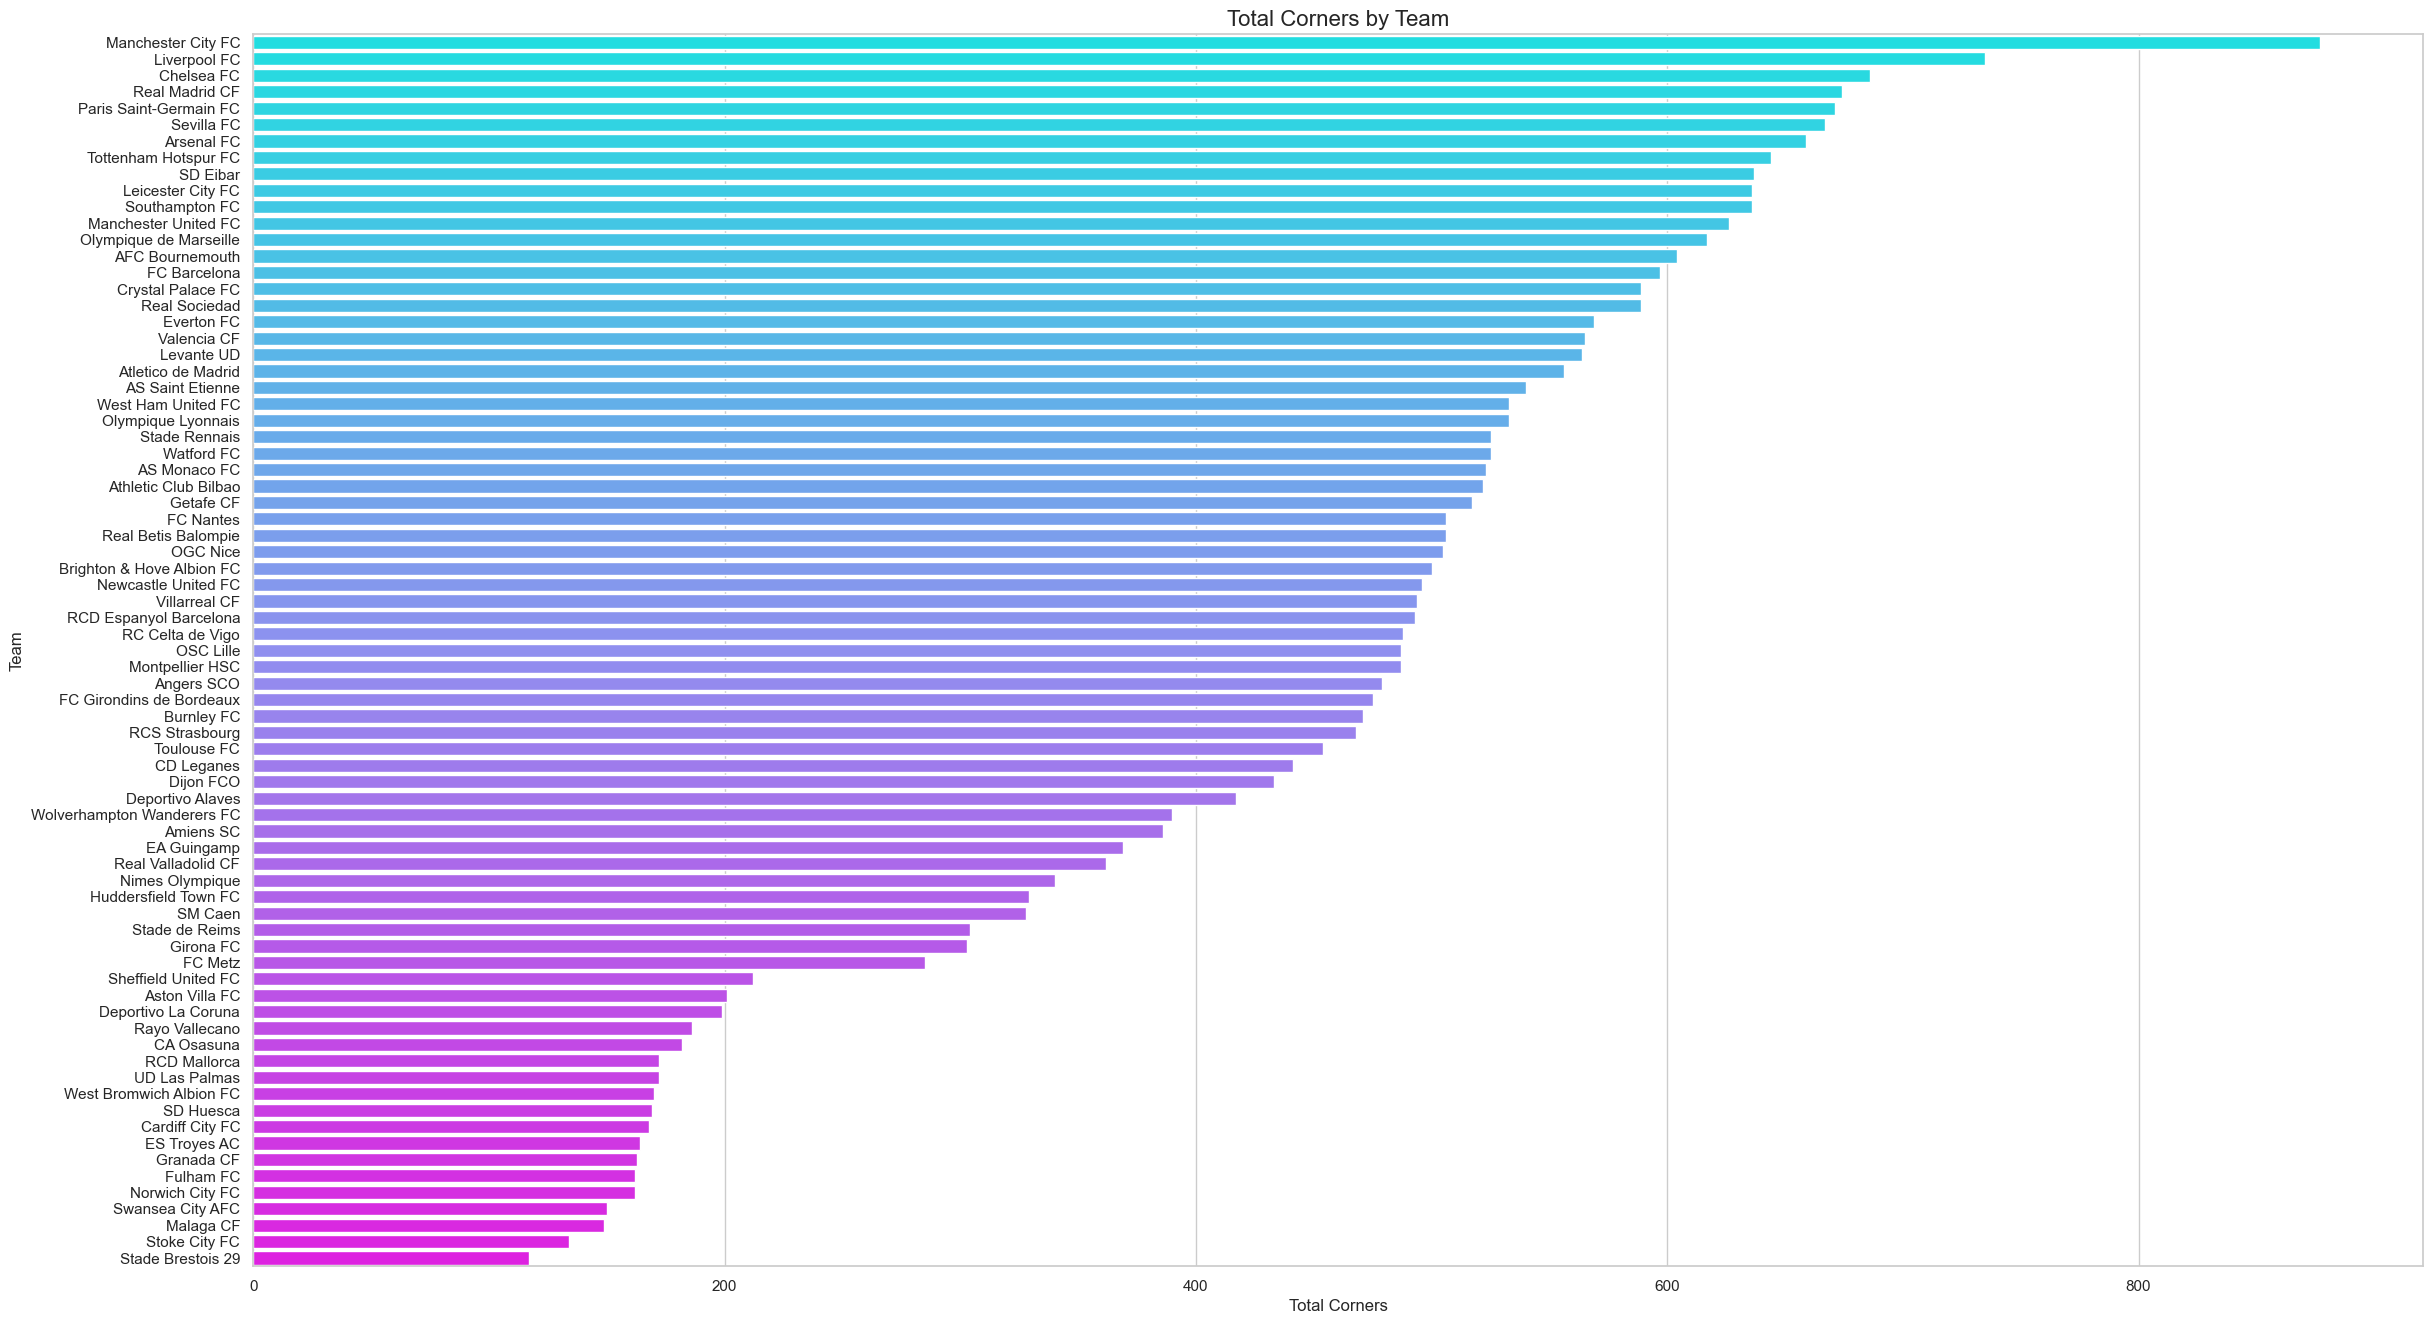

In [166]:
total_corners_sorted = total_corners.sort_values(by='TotalCorners', ascending=False)

plt.figure(figsize=(28, 16))
sns.barplot(x='TotalCorners', y='Team', data=total_corners_sorted, palette='cool')

plt.title('Total Corners by Team', fontsize=16)
plt.xlabel('Total Corners', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.show()

In [203]:
shots_per_10_league = shots_df.groupby(['League', '10-minute Period']).size().reset_index(name='Total Shots on Target')
shots_per_10_league

,League,10-minute Period,Total Shots on Target
0,La Liga,1'-10',628
1,La Liga,11'-20',824
2,La Liga,21'-30',801
3,La Liga,31'-40',847
4,La Liga,41'-50',877
5,La Liga,51'-60',967
6,La Liga,61'-70',864
7,La Liga,71'-80',800
8,La Liga,81'-90'+,1403
9,Ligue 1,1'-10',603


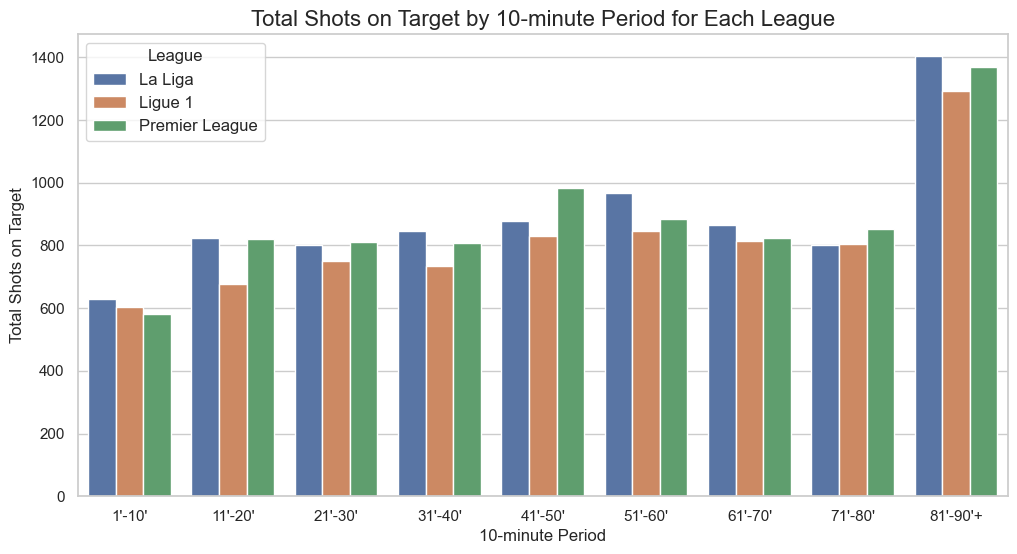

In [204]:
plt.figure(figsize=(12, 6))
sns.barplot(x='10-minute Period', y='Total Shots on Target', hue='League', data=shots_per_10_league)

plt.title('Total Shots on Target by 10-minute Period for Each League', fontsize=16)
plt.xlabel('10-minute Period', fontsize=12)
plt.ylabel('Total Shots on Target', fontsize=12)

plt.show()

In [206]:
shots_per_10_season = corners_df.groupby(['Season', '10-minute Period']).size().reset_index(name='Total Shots on Target')
corners_per_10_season

,Season,10-minute Period,Total Corners
0,2017-18,1'-10',937
1,2017-18,11'-20',1112
2,2017-18,21'-30',1143
3,2017-18,31'-40',1194
4,2017-18,41'-50',1257
5,2017-18,51'-60',1291
6,2017-18,61'-70',1215
7,2017-18,71'-80',1198
8,2017-18,81'-90'+,1806
9,2018-19,1'-10',948


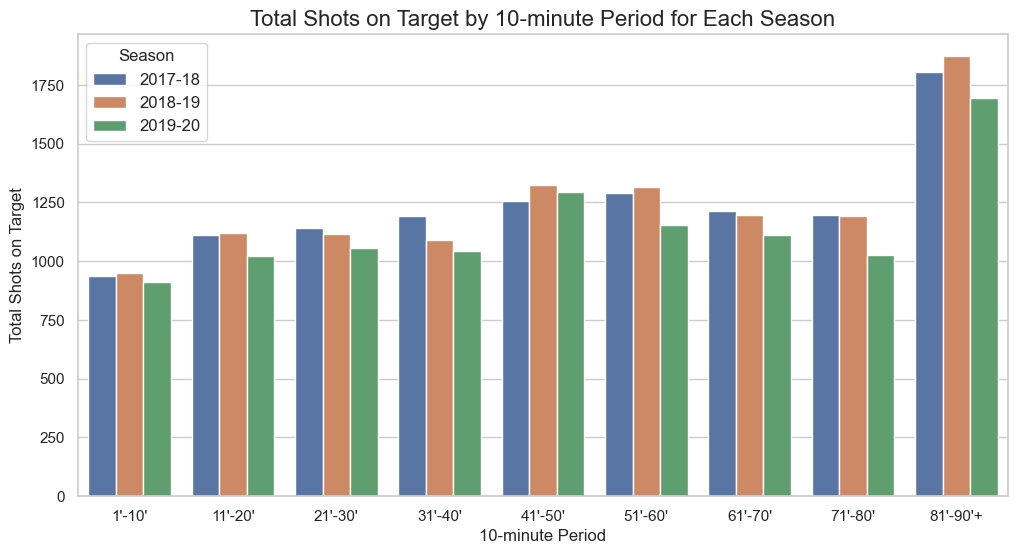

In [207]:
plt.figure(figsize=(12, 6))
sns.barplot(x='10-minute Period', y='Total Shots on Target', hue='Season', data=shots_per_10_season)

plt.title('Total Shots on Target by 10-minute Period for Each Season', fontsize=16)
plt.xlabel('10-minute Period', fontsize=12)
plt.ylabel('Total Shots on Target', fontsize=12)

plt.show()

In [209]:
home_shots = shots_df[shots_df['Incident'] == 'SHG1'].groupby('HomeTeam').size().reset_index(name='HomeShots')
away_shots = shots_df[shots_df['Incident'] == 'SHG2'].groupby('AwayTeam').size().reset_index(name='AwayShots')

home_shots.rename(columns={'HomeTeam': 'Team'}, inplace=True)
away_shots.rename(columns={'AwayTeam': 'Team'}, inplace=True)

total_shots = pd.merge(home_shots, away_shots, on='Team', how='outer')
total_shots.fillna(0, inplace=True)

total_shots['TotalShots'] = total_shots['HomeShots'] + total_shots['AwayShots']
total_shots



,Team,HomeShots,AwayShots,TotalShots
0,AFC Bournemouth,175,184,359
1,AS Monaco FC,177,203,380
2,AS Saint Etienne,227,183,410
3,Amiens SC,152,121,273
4,Angers SCO,224,156,380
...,...,...,...,...
70,Villarreal CF,199,194,393
71,Watford FC,172,160,332
72,West Bromwich Albion FC,60,54,114
73,West Ham United FC,180,156,336


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\3607695784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalShots', y='Team', data=total_shots_sorted, palette='vlag')


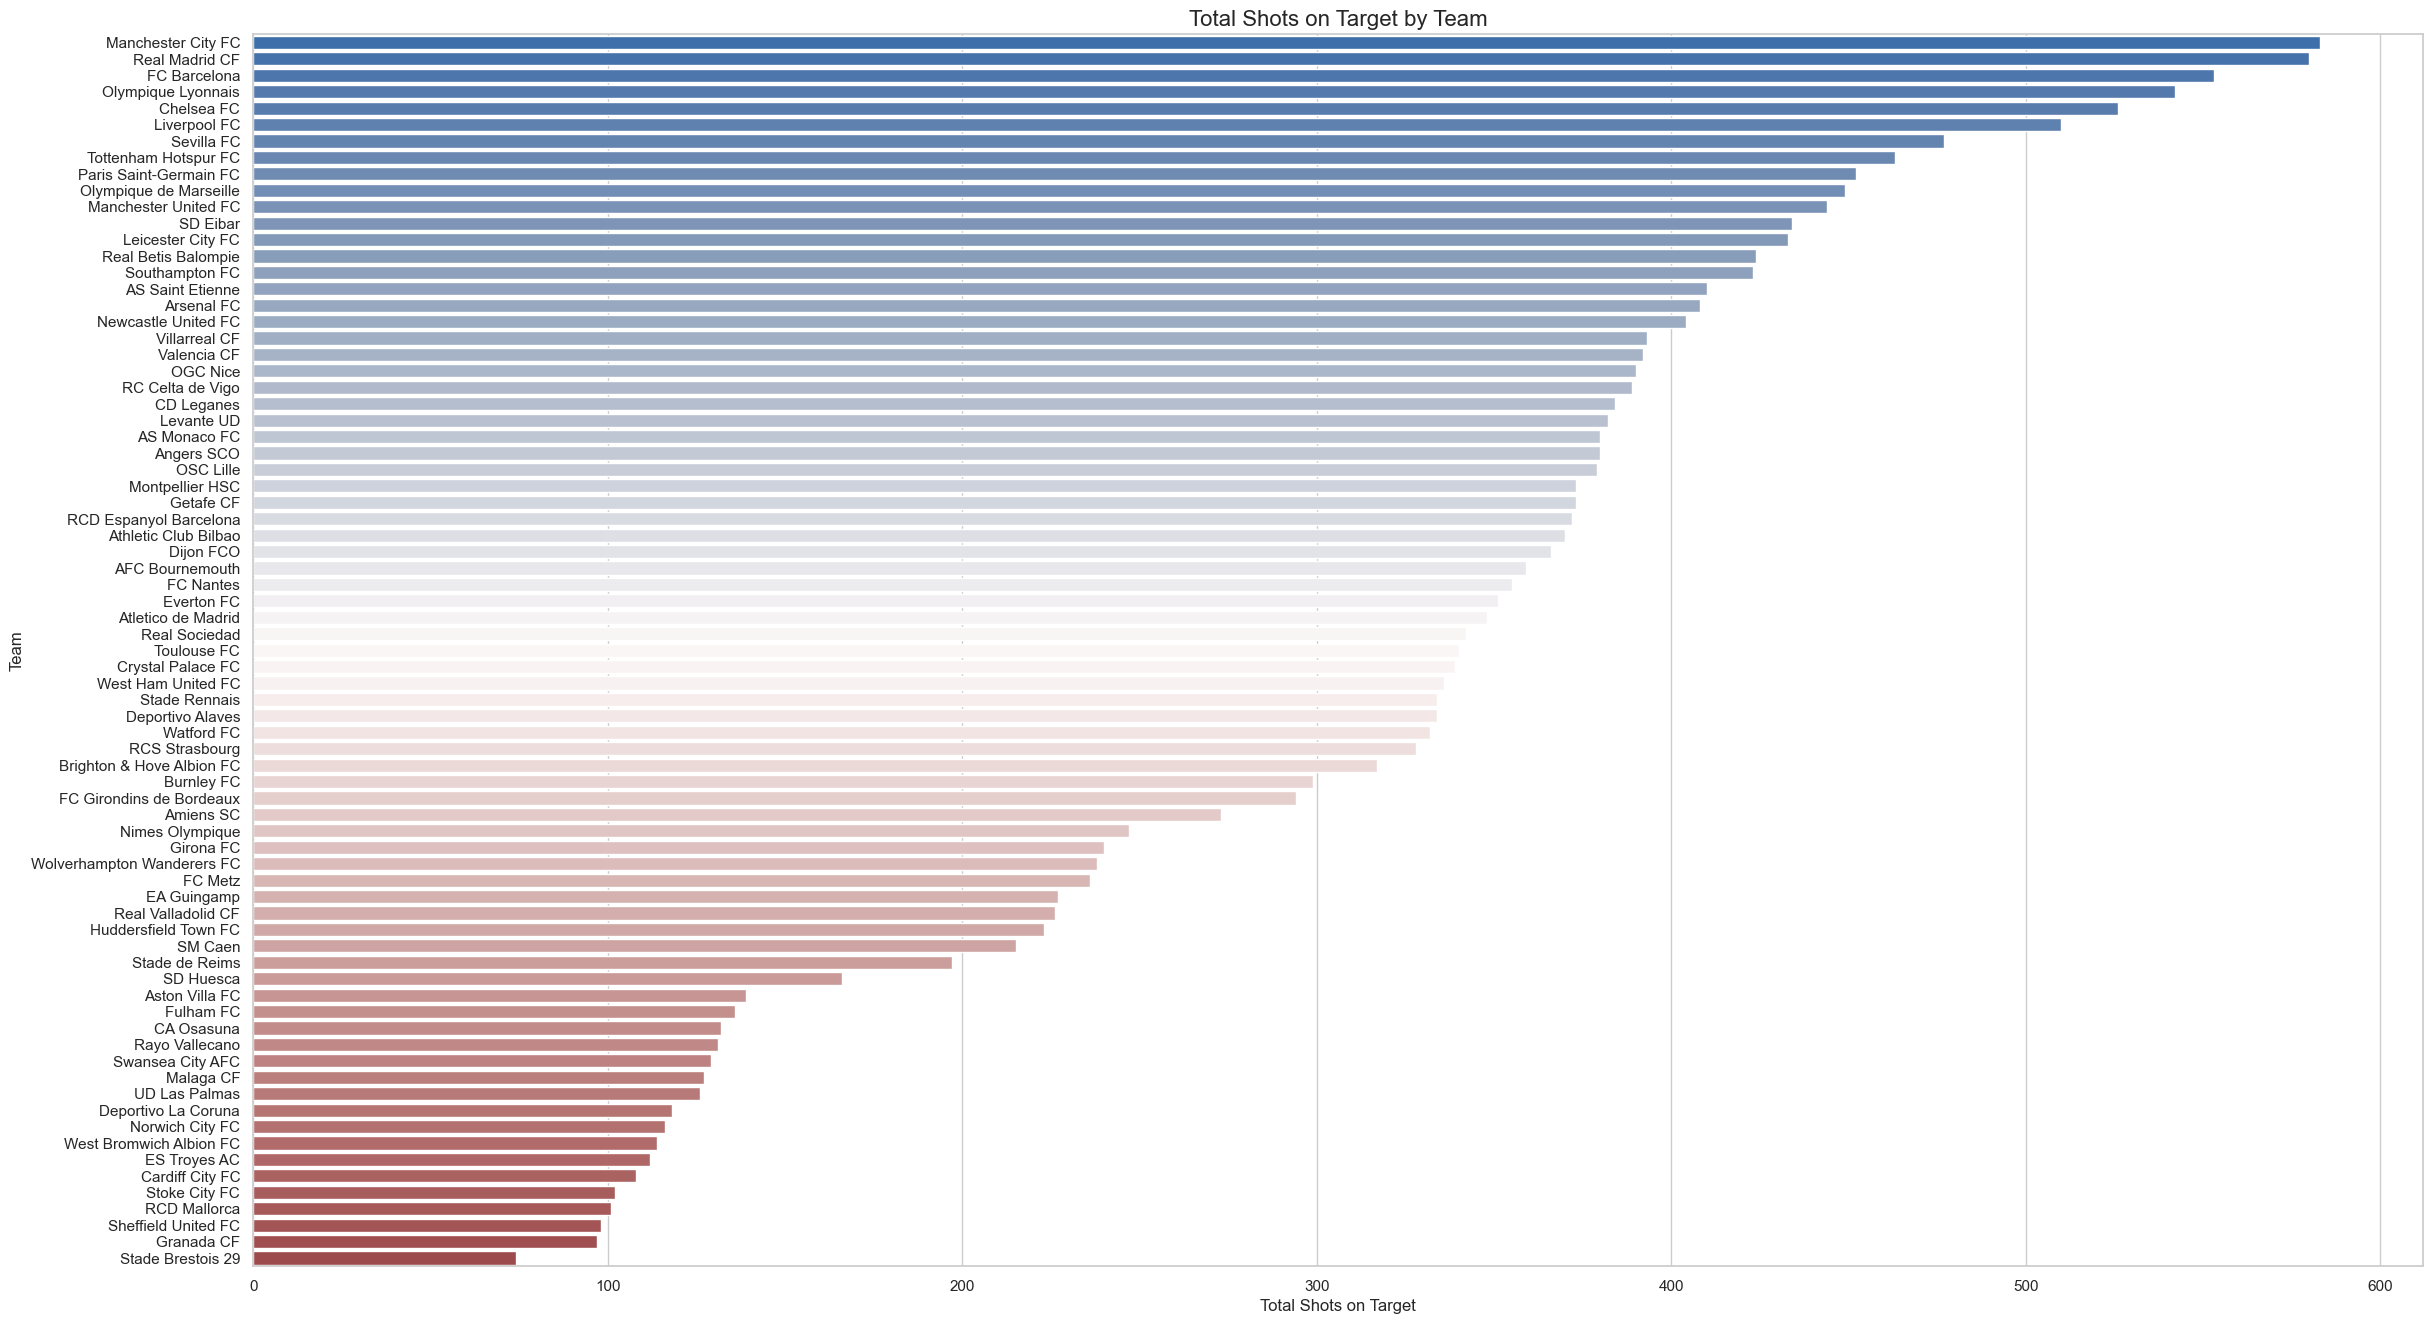

In [220]:
total_shots_sorted = total_shots.sort_values(by='TotalShots', ascending=False)

plt.figure(figsize=(28, 16))
sns.barplot(x='TotalShots', y='Team', data=total_shots_sorted, palette='vlag')

plt.title('Total Shots on Target by Team', fontsize=16)
plt.xlabel('Total Shots on Target', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.show()

In [212]:
goals_per_10_league = goals_df.groupby(['League', '10-minute Period']).size().reset_index(name='Total Goals')
goals_per_10_league

,League,10-minute Period,Total Goals
0,La Liga,1'-10',206
1,La Liga,11'-20',305
2,La Liga,21'-30',320
3,La Liga,31'-40',333
4,La Liga,41'-50',355
5,La Liga,51'-60',398
6,La Liga,61'-70',379
7,La Liga,71'-80',368
8,La Liga,81'-90'+,651
9,Ligue 1,1'-10',208


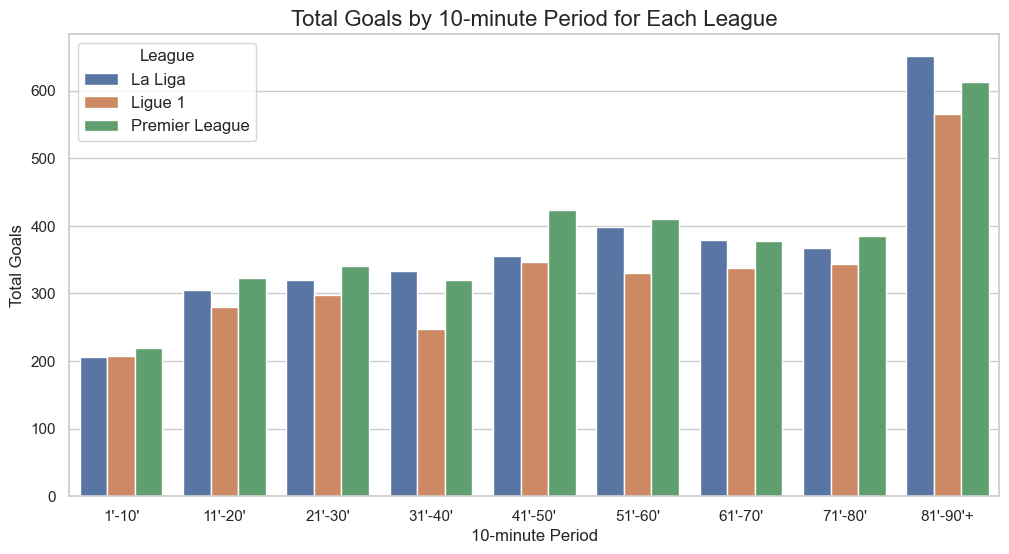

In [213]:
plt.figure(figsize=(12, 6))
sns.barplot(x='10-minute Period', y='Total Goals', hue='League', data=goals_per_10_league)

plt.title('Total Goals by 10-minute Period for Each League', fontsize=16)
plt.xlabel('10-minute Period', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)

plt.show()

In [214]:
goals_per_10_season = goals_df.groupby(['Season', '10-minute Period']).size().reset_index(name='Total Goals')
goals_per_10_season

,Season,10-minute Period,Total Goals
0,2017-18,1'-10',224
1,2017-18,11'-20',302
2,2017-18,21'-30',336
3,2017-18,31'-40',305
4,2017-18,41'-50',361
5,2017-18,51'-60',366
6,2017-18,61'-70',354
7,2017-18,71'-80',383
8,2017-18,81'-90'+,597
9,2018-19,1'-10',217


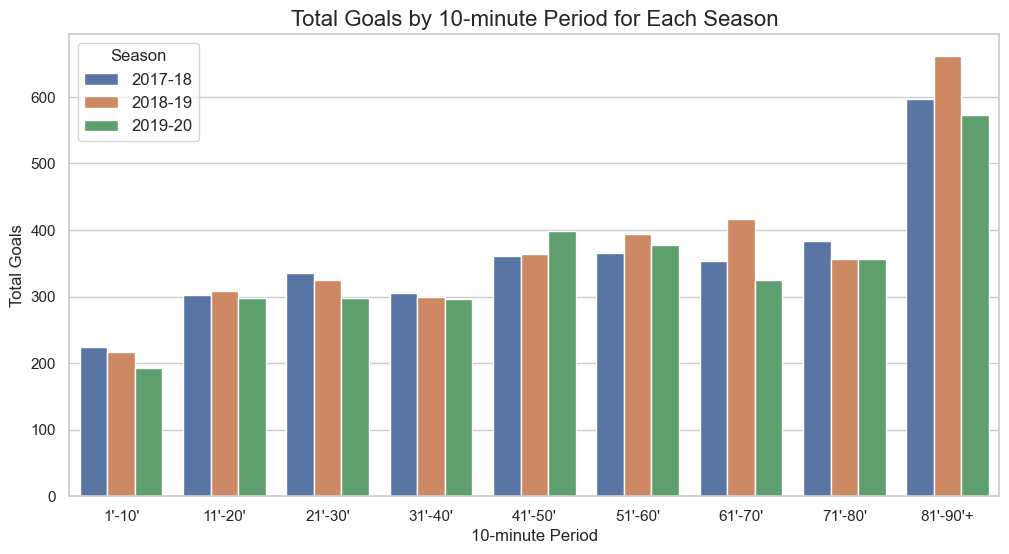

In [215]:
plt.figure(figsize=(12, 6))
sns.barplot(x='10-minute Period', y='Total Goals', hue='Season', data=goals_per_10_season)

plt.title('Total Goals by 10-minute Period for Each Season', fontsize=16)
plt.xlabel('10-minute Period', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)

plt.show()

In [217]:
home_goals = goals_df[goals_df['Incident'] == 'GOAL1'].groupby('HomeTeam').size().reset_index(name='HomeGoals')
away_goals = goals_df[goals_df['Incident'] == 'GOAL2'].groupby('AwayTeam').size().reset_index(name='AwayGoals')

home_goals.rename(columns={'HomeTeam': 'Team'}, inplace=True)
away_goals.rename(columns={'AwayTeam': 'Team'}, inplace=True)

total_goals = pd.merge(home_goals, away_goals, on='Team', how='outer')
total_goals.fillna(0, inplace=True)

total_goals['TotalGoals'] = total_goals['HomeGoals'] + total_goals['AwayGoals']
total_goals


,Team,HomeGoals,AwayGoals,TotalGoals
0,AFC Bournemouth,93,71,164
1,AS Monaco FC,103,76,179
2,AS Saint Etienne,95,58,153
3,Amiens SC,63,38,101
4,Angers SCO,76,53,129
...,...,...,...,...
70,Villarreal CF,109,78,187
71,Watford FC,75,61,136
72,West Bromwich Albion FC,19,10,29
73,West Ham United FC,98,69,167


C:\Users\giann\AppData\Local\Temp\ipykernel_9472\1040434293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalGoals', y='Team', data=total_goals_sorted, palette='icefire')


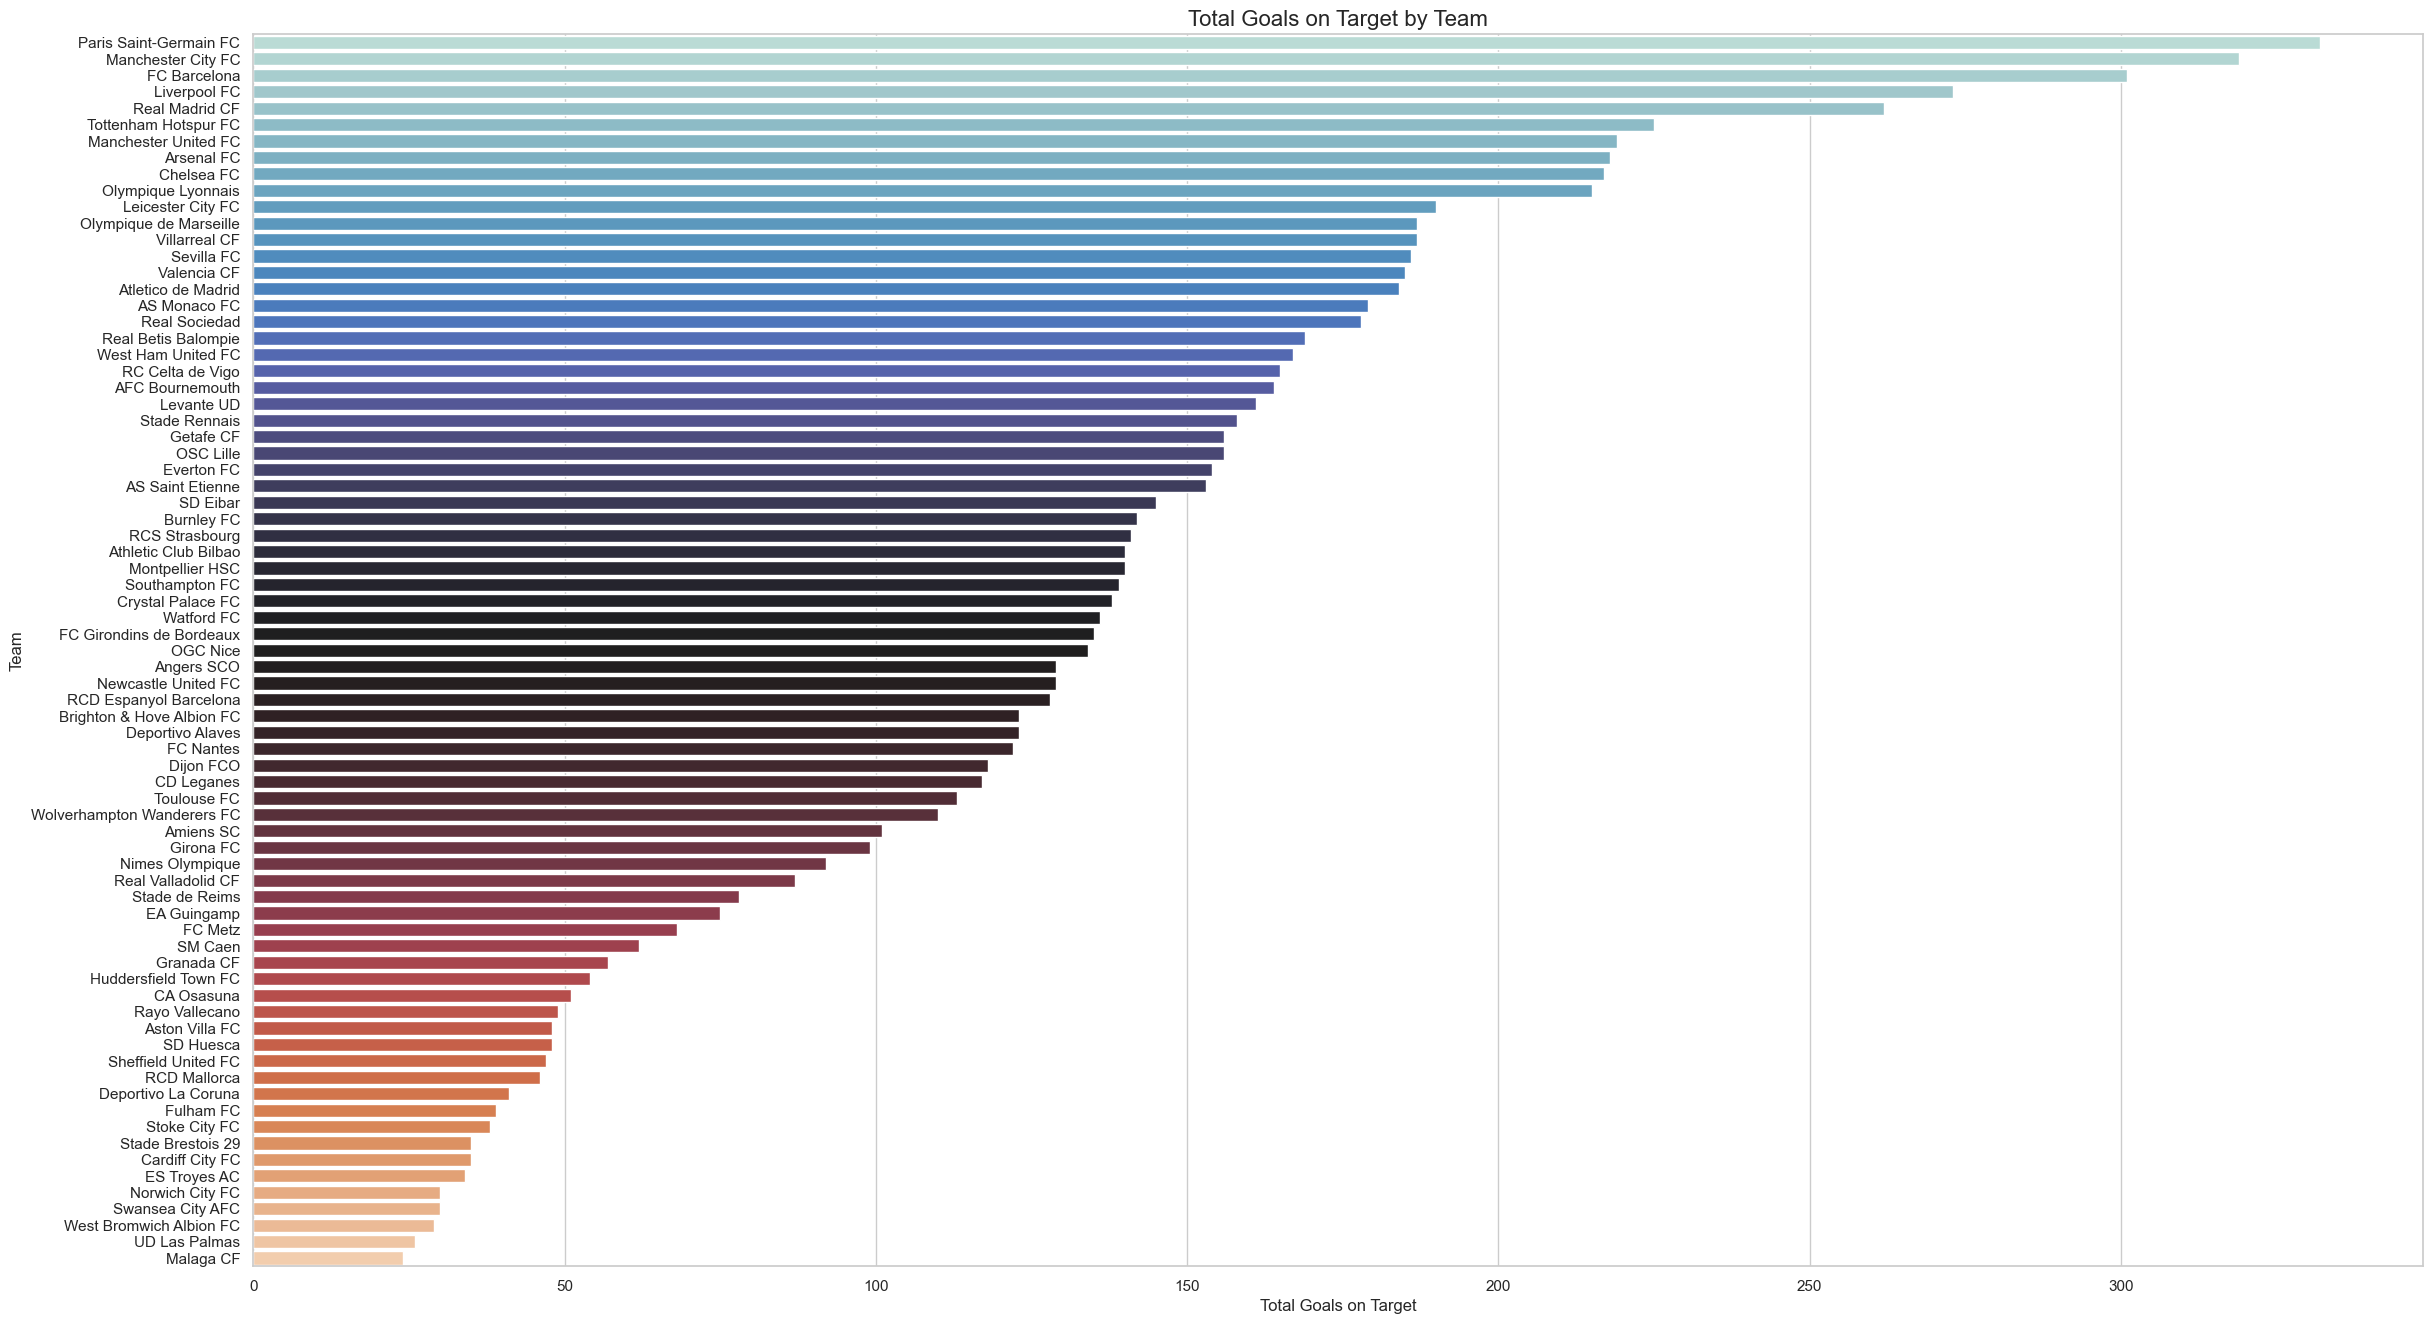

In [221]:
total_goals_sorted = total_goals.sort_values(by='TotalGoals', ascending=False)

plt.figure(figsize=(28, 16))
sns.barplot(x='TotalGoals', y='Team', data=total_goals_sorted, palette='icefire')

plt.title('Total Goals on Target by Team', fontsize=16)
plt.xlabel('Total Goals on Target', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.show()

## 7. Temporal Analysis